In [1]:
import sys
import numpy as np
ln = np.log
import analyze_helper as anh
import importlib
importlib.reload(anh)
from glob import glob
import matplotlib.pyplot as plt
from collections import defaultdict
import json
import pandas as pd
from functools import partial
import numpy.ma as npma
import scipy.optimize
import itertools as it
import collections
import matplotlib.colors
import scipy.stats
import pickle
import os
import sklearn
import sklearn.linear_model


successfully loaded /home/julian/ba_analysis/analyze_helper.py at 2022-03-25 17:24:13.081887
successfully loaded /home/julian/ba_analysis/analyze_helper.py at 2022-03-25 17:24:13.084261


In [2]:
name2long_name = {
    "lmb" : r"$\lambda$",
    "re" : "Re",
    "urms": "Mach",
    "t_eta" : "$t_\eta$",
    "t_turnover": "$t_{turnover}$",
    "t_equib": "$t_{equib}$",
    "t_boxdiff": "$t_{boxdiff}$",
    "kolmo_difft": "$t_{kolmo, diff}$",
    "v" : "visc",
    "f" : "forcing_magnitude",
    "t_div": "$t_{div}$"
}

def name_to_long_name(name):
    if name in name2long_name:
        return name2long_name[name]
    else:
        return name

def beautify(name):
    
    name_parts_list = name.split("_")
    npl = name_parts_list
    
    if npl[-1] in ["max", "median", "min"]:
        
        return name_to_long_name("_".join(npl[:-1]))+r"$_{"+npl[-1]+"}$"
    
    else:
        return name_to_long_name("_".join(npl))
      


In [3]:
print(beautify("t_eta"))
print(beautify("t_eta_max"))
print(beautify("re_max"))
print(beautify("t_turnover"))

$t_\eta$
$t_\eta$$_{max}$
Re$_{max}$
$t_{turnover}$


In [4]:
mapped_chars = {"<": "lt", "=":"eq", ">":"gt", ".":"p", "-":"_", "\\" : "", "$":"", "/" : "", "_":"_",
                "%":"perc", "\n": "", ":": "_"}
save_dir = "/home/julian/BA/img/"
def make_alphanumeric(title):
    newtitle = []
    for c in title:
        if c.isalnum():
            newtitle.append(c)
        elif c.strip() == "":
            newtitle.append("_")
        elif c in mapped_chars:
            newtitle.append(mapped_chars[c])
        else:
            print("Cant handle character: \""+c+"\"")
    return "".join(newtitle)
            
    
def fin(title, savename, suptitle=False):
    if suptitle:
        plt.gcf().suptitle(title)
    else:
        plt.title(title)
    real_save = save_dir+make_alphanumeric(savename)+".png"
    plt.savefig(real_save,bbox_inches="tight")
    plt.show()
    print(f"========\nsaved {title} to {real_save}\n======\n\n")

In [5]:
load_from_file = True

In [6]:
###########
## load the data instead of recalculating
###########

if load_from_file:
    with open("all_singles.pl", "rb") as f:
        all_singles = pickle.load(f)

In [7]:
fitres_cache_file = "final_fitres.json"
imported_patterns = []
if not load_from_file:
    all_singles = []

In [8]:
#do_plot can be False for "never", True for "always" and None for "maybe"
def import_set(pattern,f=False, do_plot=None):
    global all_singles, imported_patterns
    if not f and pattern in imported_patterns:
        print(pattern, " already imported")
        return
    new = list((map(lambda s : anh.SingleSimul(s,fitres_cache_file, do_plot), sorted(anh.filter_successful(glob("data/"+pattern)+glob("data/analysis/"+pattern))))))
    print(len(new))
    #if len(new) == 0:
    #    raise ValueError("no simuls in set ", pattern)
    all_singles.extend(new)
    print("imported ", len(new), " dirs for ", pattern)
    imported_patterns.append(pattern)

In [9]:
# bad simuls are:
#import_set("X_var_hel-force_99-12-1098", True, True)
#import_set("X_var_hel-force_99-12-93", True, True)
#import_set("X_var_hel-force_99-12-94", True, True)
#import_set("other_const_mach_simuls-20", True, True)
print("commenting out worked in time")

commenting out worked in time


In [10]:
# cancel the upper limit for time -> done
# make errors RELATIVE -> done 
# exclude high errors -> include as data column instead

if not load_from_file:

    import_set("hel_one*")
    #import_set("hel_one_high_re_proper_dsxy-*")
    #import_set("hel_one_high_re_proper_dsxy_rerun-*")
    #import_set("hel_one_grid_sampling-*")
    #import_set("hel_one_grid_sampling_new-*")
    #import_set("hel_one_medium_re-*")
    #import_set("hel_one_high_re-*")
    
    import_set("hel_zero*")

    import_set("hel_some_low_re-*")
    import_set("hel_some_medium_re-*")
    import_set("hel_some_high_re-*")

    import_set("high_re_proper_dsxy-*")
    import_set("low_Re_sampling-*")
    import_set("A_correct_hel_*")
    import_set("X_var_hel-force*")
    import_set("var_hel-force*")
    import_set("A_var_hel_*-*")
    import_set("more_zero_hel_mid_Re-*-*")
    import_set("more_zhel_midhigh_Re-*-*")
    import_set("more_zhel_midlow_Re-*-*")
    import_set("more_zhel_somewhere_Re-*-*")
    import_set("low_force*")
    import_set("mass_simuls_helzero*")
    import_set("const_mach_simuls*")
    import_set("other_const_mach_simuls-*")
    import_set("more_const_mach_simuls-*")



In [11]:
print(len(all_singles))

68359


In [12]:
if not load_from_file:
    tstats = anh.get_timestep_stats()
    print(tstats)
    plot_data = tstats.arr
    n,bins,patches = plt.hist(plot_data,bins=300)
    print(bins[:5])
    print(n[:5])
    print(patches[:5])
    plt.vlines(1.0, 0, max(n) )
    plt.show()
else:
    print("not useful if not loaded from file")

not useful if not loaded from file


In [13]:
###############
# put back into file
###############


if not load_from_file:
    with open("all_singles.pl", "wb") as f:
        pickle.dump(all_singles, f)

In [14]:
import subprocess
subprocess.check_output(["ls", "-l", "all_singles.pl"])

b'-rw-r--r--. 1 julian julian 264008832 Mar  3 13:44 all_singles.pl\n'

In [15]:
#################################
## DEFINE DATAFRAMES ############
#################################

# create rows
rows = []
columns = ["re", "urms", "t_eta", "hel", "v", "f", "lmb", "dt", "nx", "dx", "fit_err", "eta", "u_eta","kolmo_difft","end_time","g1","g10","g20","g50","gfin","t_turnover","t_boxdiff", "equib_time","eps", "re_old", "inc10", "inc15", "inc20"]
quants = ["mean", "median", "min", "max", "std", "q25", "q75"]
for s in all_singles:
    dx = anh.return_if_equal([s.opts["dsx"],s.opts["dsy"],s.opts["dsz"]])
    # Kolmogorov calculation only here, not inside 
    eps = s.opts["forcing_magnitude"]*s.urms
    kolmo_len = (s.opts["viscosity"]**3 / eps)**(1/4)
    kolmo_time = (s.opts["viscosity"]/eps)**(1/2)
    kolmo_velo = (s.opts["viscosity"]*eps)**(1/4)
    kolmo_difft = (kolmo_len)**2/s.opts["viscosity"] # time it takes to diffuse over one kolmogorov length
    #kolmo_difft and kolmo_time are totally the same
    kolmo_urms_turnover_time = kolmo_len / s.urms
    
    box_len = 2*np.pi
    t_turnover = box_len / s.urms
    t_boxdiff = box_len**2/s.opts["viscosity"]
    
    equib_time = s.real_time[0]
    
    inc10 = anh.increase_after_real_time(s,kolmo_time)
    inc15 = anh.increase_after_real_time(s,kolmo_time*1.5)
    inc20 = anh.increase_after_real_time(s,kolmo_time*2.0)
    
    new_re = s.urms**2 * np.sqrt(5/(3*(eps*s.opts["viscosity"])))
    
    #columns =  ["re",   "urms", "t_eta",    "hel",            "v",                 "f",                         "lmb",                     "dt",     "nx",         "dx", "fit_err",                "eta",     "u_eta",    "kolmo_difft", "end_time",  "g1", "g10", "g20", "g50", "gfin", "t_turnover", "t_boxdiff", "equib_time", "eps", "re_old", "inc10",  "inc15", "inc20"]
    rows.append([new_re, s.urms, kolmo_time, s.opts["relhel"], s.opts["viscosity"], s.opts["forcing_magnitude"], ln(s.fitres.a)*kolmo_time, s.avg_dt, s.opts["nx"], dx,   s.fitres.worst_point_err, kolmo_len, kolmo_velo, kolmo_difft,   s.end_time,  s.g1, s.g10, s.g20, s.g50, s.gfin, t_turnover,   t_boxdiff,   equib_time,   eps,    s.Re,    inc10,    inc15,   inc20])

singles_df = pd.DataFrame(rows, columns=columns)  
df = singles_df
df = df.loc[(df.equib_time > df.t_turnover)] # the one simul that doesnt have this is just some misconfiguration
#df.hel = np.where(df.hel==0.99, 1.0, df.hel) # set hel=0.99 to hel=1.0 because it makes code easier in a few places
print(np.sum(df.hel==1.0))
#df.loc[df.hel==0.99, "hel"] = 1.0
print(np.sum(df.hel==1.0))
#assert(sum(df.hel==0.99)==0)

35680
35680


In [61]:
plot_num = 0
# xdat must be sorted

import barfit as bf
importlib.reload(bf)

    
def data_deriv_simple(x,xdat,ydat,binsize):
    
    # vielleicht kann ich forcieren, dass die Gerade durch irgendeinen Punkt laufen muss??
    # dann waere sie an der richtigen Stelle.
    
    xl = x - binsize/2
    xh = x + (x - xl) # symmetric
    li = np.searchsorted(xdat, xl)
    hi = np.searchsorted(xdat, xh)
    
    weights = 1-np.exp(-np.linspace(-10,10,hi-li)**2)
    
    if hi-li < 300:
        return np.NaN
    
    xfit = (xdat[li:hi] - np.mean(xdat[li:hi])).reshape(-1,1)
    yfit = (ydat[li:hi] - np.mean(ydat[li:hi])).reshape(-1,1)
    
    
    lr = sklearn.linear_model.LinearRegression(fit_intercept=False)
    lr.fit(xfit, yfit, weights)
    slope = lr.coef_[0][0]
    
    # for checking if this makes sense
    global plot_num
#     if plot_num%30 == 0:
#         plt.scatter(xfit, yfit, color="grey", s=3, alpha=0.2)
#         plt.plot(xfit, slope*xfit)
#         plt.title(f"Re={x}, slope={slope}")
#         plt.show()
    plot_num+=1
    
    return slope

def data_deriv(x,xdat,ydat):
    
    global plot_num
    show=False
    if plot_num%10==0:
        show=True
    plot_num+=1
    
    slope = bf.data_deriv_barfit(x,xdat,ydat,show=show,fix_at_bottom=False)
    
    return slope
    
    

for hel in [0.0, 0.3, 1.0]:
    dfh = df[df.hel==hel]
    re = dfh.re.to_numpy()
    lmb = dfh.inc15.to_numpy()
    # the fitting-error is not the indicator

    re_sorti = np.argsort(re)
    re = re[re_sorti]
    lmb = lmb[re_sorti]
    
    

    re_plot = np.linspace(0.2,12,100)
    deriv = np.zeros(len(re_plot))
    for i in range(len(deriv)):
        re_point = re_plot[i]
        binsize = re_point*0.3
        deriv[i] = data_deriv_simple(re_point, re, lmb,binsize)

    success_filt = ~np.isnan(deriv)
    re_plot = re_plot[success_filt]
    deriv = deriv[success_filt]
    plt.plot(re_plot, deriv)
    plt.axhline(0.0,color="black")
    plt.xlabel("Re_\lambda")
    plt.ylabel("d(inc)/dRe")
    plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

23848
(23848,)
(23848,)
after filtering:  (11343,)
139
RE_C FROM CLOSEST POINT::::  1.5477628572745037
0
RE_C FROM CLOSEST AVERAGED POINT::::  0.6764102930118393
LinearRegression()
[0.00160198]
(11343,) (11343,) (11343, 1) 2
alpha, B from fitting:
[-0.03644792] [0.00539694]
D from linear prediction:  [1.01915899]


/usr/lib64/python3.10/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib64/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


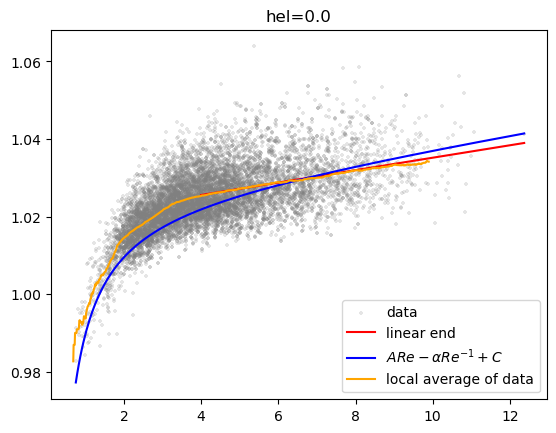

saved hel=0.0 to /home/julian/BA/img/double_fit_hel_0p0.png


[2.5, 1.25, 0.625, 0.9375, 1.09375, 1.171875, 1.2109375, 1.23046875, 1.220703125, 1.2158203125]
#######################
##RE_C:::  1.2158203125
#######################
8026
(8026,)
(8026,)
after filtering:  (2589,)
1132
RE_C FROM CLOSEST POINT::::  3.865056095071139
0
RE_C FROM CLOSEST AVERAGED POINT::::  2.0028215033264973
LinearRegression()
[0.00252861]
(2589,) (2589,) (2589, 1) 2
alpha, B from fitting:
[-0.03985116] [0.00890749]
D from linear prediction:  [1.01461121]


/usr/lib64/python3.10/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib64/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


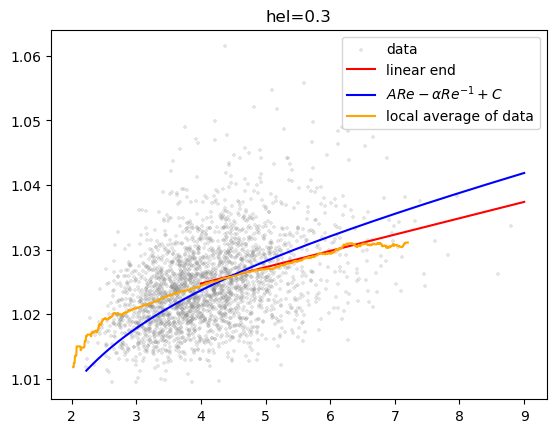

saved hel=0.3 to /home/julian/BA/img/double_fit_hel_0p3.png


[2.5, 1.25, 1.875, 2.1875, 2.03125, 1.953125, 1.9921875, 2.01171875, 2.021484375, 2.0263671875]
#######################
##RE_C:::  2.0263671875
#######################
35680
(35680,)
(35680,)
after filtering:  (9316,)
708
RE_C FROM CLOSEST POINT::::  2.5464859484023163
0
RE_C FROM CLOSEST AVERAGED POINT::::  1.1027823317488874
LinearRegression()
[0.00358072]
(9316,) (9316,) (9316, 1) 2
alpha, B from fitting:
[-0.05472582] [0.01105496]
D from linear prediction:  [1.00655488]


/usr/lib64/python3.10/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib64/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


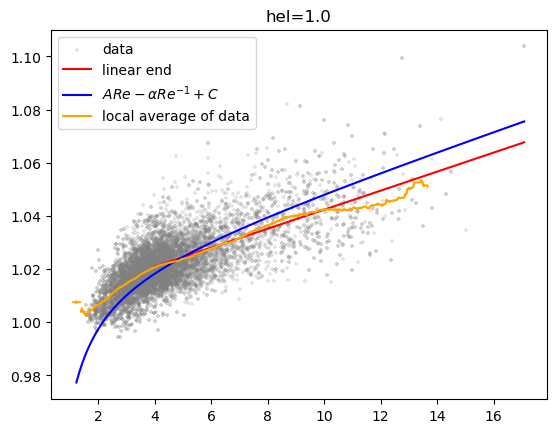

saved hel=1.0 to /home/julian/BA/img/double_fit_hel_1p0.png


[2.5, 1.25, 0.625, 0.9375, 1.09375, 1.171875, 1.1328125, 1.11328125, 1.123046875, 1.1181640625]
#######################
##RE_C:::  1.1181640625
#######################
{0.0: 1.2158203125, 0.3: 2.0263671875, 1.0: 1.1181640625}
{0.0: 0.6764102930118393, 0.3: 2.0028215033264973, 1.0: 1.1027823317488874}


/usr/lib64/python3.10/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib64/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [21]:
### before filtering out the non-chaotic ones and grouping the systems, find out where the critical Reynolds-number is for all the helicities

# plt.rcParams.update({"text.usetex": True})
# plt.rcParams["text.latex.preamble"] = plt.rcParams["text.latex.preamble"].join([
#         r"\usepackage{amsmath}",              
# ])

hel2Re_c = {}
hel2Re_c_alt = {}
linear_start =4
inv_end = 4

for hel in [0.0, 0.3, 1.0]:
    dfh = df.loc[df.hel==hel]
    print(len(dfh))
    redat = dfh.re.to_numpy()
    print(redat.shape)
    g20dat = dfh.inc20.to_numpy()
    print(g20dat.shape)
    
    nanfilter = ~np.isnan(g20dat)
    redat = redat[nanfilter]
    g20dat = g20dat[nanfilter]
    print("after filtering: ", g20dat.shape)
    
    
    
    def scatter_on_re(dat):
        plt.scatter(redat, dat, s=5, marker="+", color="grey", label="data",alpha=0.2)
    
    # show all datapoints
    scatter_on_re(g20dat)
    
    
    # show re->f(re), where f shows the percentage of points with lambda > 1 around this value
    ix = np.argsort(redat)
    redat = redat[ix]
    g20dat = g20dat[ix]
    g20crit = g20dat >= 1.0    
    
    #assert np.sum(g20crit)<len(g20crit), "It seems like the non-chaotic ones have been filtered out"
    
    # maps re to "fraction of simulations that are chaotic in this range
    def f(re): # returns (value, #datapoints, avg)
        re_low = 0.9*re
        re_high = re + (re - re_low) # interval symmetric anyways
        li, hi = np.searchsorted(redat, [re_low, re_high])
        num_dp = hi-li
        val = np.mean(g20crit[li:hi])
        avg = np.mean(g20dat[li:hi])
        
        return val, num_dp, avg
    
    def f_val_only(re):
        res,_,_ = f(re)
        return res
    
    re_arr = np.linspace(redat[0]*0.9,redat[-1]*0.8,1000)
    num_dp_arr = np.full_like(re_arr, fill_value=np.NaN)
    val_arr = np.full_like(re_arr, fill_value=np.NaN)
    avg_arr = np.full_like(re_arr, fill_value=np.NaN)
    for i in range(len(re_arr)):
        val_arr[i], num_dp_arr[i], avg_arr[i] = f(re_arr[i])
    
    i1 = np.argmin(np.abs(g20dat-1.0))
    print(i1)
    print("RE_C FROM CLOSEST POINT:::: ", redat[i1])
    i2 = np.argmin(np.abs(avg_arr))
    print(i2)
    print("RE_C FROM CLOSEST AVERAGED POINT:::: ", re_arr[i2])
    hel2Re_c_alt[hel] = re_arr[i2]
    
    #do the linear regression for the last part of the data
    
    lr1 = sklearn.linear_model.LinearRegression()
    li = np.searchsorted(redat,linear_start)
    lr1.fit(redat[li:].reshape(-1,1), g20dat[li:].reshape(-1,1))
    print(lr1)
    print(lr1.coef_[0])
   
    
    # what if you subtract the linear part?
    
    g20dat_s = ((g20dat - lr1.predict(redat.reshape(-1,1))[:,0])*redat)
    print(g20dat_s.shape, redat.shape, g20dat_s.reshape(-1,1).shape, g20dat_s.reshape(-1,1).ndim)
    lr2 = sklearn.linear_model.LinearRegression(fit_intercept=True)
    Re_high = inv_end # last Reynolds number to use for fitting
    endx = np.searchsorted(redat, Re_high)
    lr2.fit((1/redat[:endx]).reshape(-1,1), g20dat_s[:endx].reshape(-1,1),(np.exp(1/redat[:endx]**4)))
    #plt.show()
    #plt.scatter((1/redat[:endx]), g20dat_s[:endx],**kw)
    alpha = lr2.coef_[0]
    B = lr2.intercept_
    #plt.plot(1/redat[:endx], alpha/redat[:endx] + B)
    #plt.show()
    print("alpha, B from fitting:")
    print(alpha, B)
    
    # plot the linear prediction
    re_lr_plot_arr = np.linspace(linear_start,redat[-1],300)
    plt.plot(re_lr_plot_arr, lr1.predict(re_lr_plot_arr.reshape(-1,1)), color="red", label=f"linear end")
    # slope and intercept of this shall be called Ax+D
    A = lr1.coef_[0]
    D = lr1.intercept_
    
    # plot the 1/x prediction
    print("D from linear prediction: ", D)
    re_plot = np.linspace(redat[0],redat[-1],300)
    combined_fit_arr =  alpha/re_plot + A*re_plot + D + B
    plt.plot(re_plot, combined_fit_arr, color="blue", label=r"$A Re- \alpha Re^{-1} + C$")
    
    
    #plot average over data
    plt.plot(re_arr, avg_arr, color="orange", label="local average of data")
    
    plt.legend()
    fin(f"hel={hel}", f"double_fit_hel_{hel}")
    
    ## do alternative: a a*Re^delta system
    ## fit ln(a) + delta*ln(re) = ln(g20)
    #
    #lr_alt = sklearn.linear_model.LinearRegression()
    #lnre = ln(redat).reshape(-1,1)
    #lng20 = ln(g20dat).reshape(-1,1)
    #lr_alt.fit(lnre, lng20)
    #alpha_alt = np.exp(lr_alt.intercept_)
    #delta_alt = lr_alt.coef_[0]
    #
    #plt.plot(re_plot, alpha_alt*re_plot**delta_alt, color="green", label="alt fit")
    
    
    #finalize
    #plt.xscale("log")
    #plt.yscale("log")
    
    #plt.legend()
    #plt.show()
    
    
    #plot certainty
    #plt.plot(re_arr, num_dp_arr)
    #plt.show()
    
    #plot percentage of lmb>1 simulations in the box
    #plt.plot(re_arr, val_arr)
    #plt.show()
    
    # find point where half of the simulations are chaotic through binary search
    
    search_hist = []
    def bin_search(fun,a,b,find_val=0.5): # am I too stupid to find  a similar function in a library???
        assert(b>a)
        #assert(fun(a) < find_val)
        #assert(fun(b) > find_val)
        
        # softer condition than quitting, makes this always return a value
        if fun(a) >= find_val:
            return a
        elif fun(b) <=  find_val:
            return b
        
        m = (b+a)/2
        search_hist.append(m)
        if (b-a) < 0.01:
            return m
        res = fun(m)
        if res > find_val:
            return bin_search(fun, a,m)
        else:
            return bin_search(fun, m,b)
    
    Re_c = bin_search(f_val_only,0,5,find_val=0.5)
    print(search_hist)
    print("#######################")
    print("##RE_C::: ",Re_c)
    print("#######################")
    
    
    # calculating the derivative from the data is much better done with the linear fits
    
#     def smoothen(x,times=1):
#         if times==0:
#             return x
#         smoother = np.exp(-np.linspace(-10,10,11)**2)
#         smoother /= np.sum(smoother)
#         return np.convolve(smoother, smoothen(x,times-1), mode="same")
    
#     # what does the derivative look like??
#     smavg = smoothen(avg_arr,times=5)
#     st = np.array([1/280, -4/105, 1/5,-4/5, 0, 4/5,-1/5,4/105,-1/280])
#     d1 = np.convolve(st, smavg, mode="same")
#     #d1 = smoothen(avg_arr,times=5)
#     print(re_arr.shape)
#     plt.plot(re_arr[30:-30], d1[30:-30])
#     plt.show()
    
    hel2Re_c[hel] = Re_c
    
plt.rcdefaults()
print(hel2Re_c)
print(hel2Re_c_alt)

g20 becomes linear, before that, something else happens. But what?

g20 is dimensionless, or is it? It is the relative growth per 2 Kolmogorov times.

What other dimensionless quantity can be made from Re that has an asymptotic growing behaviour?
what about -(1/Re) (= - tau_kolmo / tau_int )
what about exponential: exp(-Re) ? exponential would be weird here

In [22]:
###BASIC FILTERING###
# I shouldnt filter before I group. I should filter, then group. Probably.
print("unfiltered:", len(df))
print("g20-fail:", len(df.loc[df.g20 <= 1]))
print("gfin-fail:", len(df.loc[df.gfin <= 1]))
print("fail at least one:", len(df.loc[(df.gfin <= 1) | (df.g20 <= 1)]))
df = df.loc[(df.g20>1) & (df.gfin>1)]

print("filtered:", len(df))
print("long enough:",len(df))

unfiltered: 68356
g20-fail: 9860
gfin-fail: 12883
fail at least one: 12946
filtered: 55410
long enough: 55410


In [23]:
class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self
        
def subset_data(*conds):
    
    final_cond = conds[0][0].copy()
    final_desc = conds[0][1]
    for c, d in conds[1:]:
        final_cond &= c.copy()
        final_desc += " and " + d
    
    
    local_df = df.copy()
    filtered = local_df.loc[final_cond]
    filtered = filtered.groupby(["v","f","hel"], as_index=False)
    filtered.q25 = lambda : filtered.quantile(q=0.25)
    filtered.q75 = lambda : filtered.quantile(q=0.75)
    
    def make_key(c,q):
        if q=="mean":
            return c
        return c+"_"+q
    # this is inefficient as hell: it calculates the descriptive statistic for every value many times.
    res = {make_key(c,q) : eval(f"filtered.{q}()", {"filtered":filtered})[c].to_numpy() for q,c in it.product(quants,columns)}
    res["weights"] = filtered.size()["size"].to_numpy()
    res["simul_count"] = np.sum(res["weights"])
    res["desc"] = final_desc
    
    res = AttrDict(res)
    print("created subset <<", res.desc, ">> with ", len(res.re), " datapoints")
    return res

### some conditions
    
hel_zero = df["hel"] == 0.0, "hel=0.0"
hel_some = df["hel"] == 0.3, "hel=0.3"
hel_one = df["hel"].isin([1.0,0.99]), "hel=1.0"

nx_128 = df["nx"] == 128, "nx=128"
nx_256 = df["nx"] == 256, "nx=256"

err1 = df["fit_err"] < 0.01, "err<1%"
err2 = df["fit_err"] < 0.02, "err<2%"
err5 = df["fit_err"] < 0.05, "err<5%"

low_visc = df["v"] < df["f"]/20 , "low_visc"
high_visc = df["v"] >= df["f"]/20, "high_visc"

al = np.full(len(df),True) , "all data"

re_points = list(range(10,250,15))
re_brackets = zip(re_points[0:-1], re_points[1:])
re_conds = {(min_re, max_re): ((df["re"] >= min_re) & (df["re"] < max_re), f"{min_re}<=Re<{max_re}") for min_re, max_re in re_brackets}

h1 = subset_data(hel_one, err2)
hs = subset_data(hel_some, err2)
h0 = subset_data(hel_zero, err2)
h1hv = subset_data(hel_one, high_visc)
h1lv = subset_data(hel_one, low_visc, err5)
e5 = subset_data(err5)
e2 = subset_data(err2)
all_data = subset_data(al)

created subset << hel=1.0 and err<2% >> with  807  datapoints
created subset << hel=0.3 and err<2% >> with  461  datapoints
created subset << hel=0.0 and err<2% >> with  702  datapoints
created subset << hel=1.0 and high_visc >> with  226  datapoints
created subset << hel=1.0 and low_visc and err<5% >> with  626  datapoints
created subset << err<5% >> with  2017  datapoints
created subset << err<2% >> with  1975  datapoints
created subset << all data >> with  2053  datapoints


In [24]:
print(plt.rcParams["text.usetex"])

False


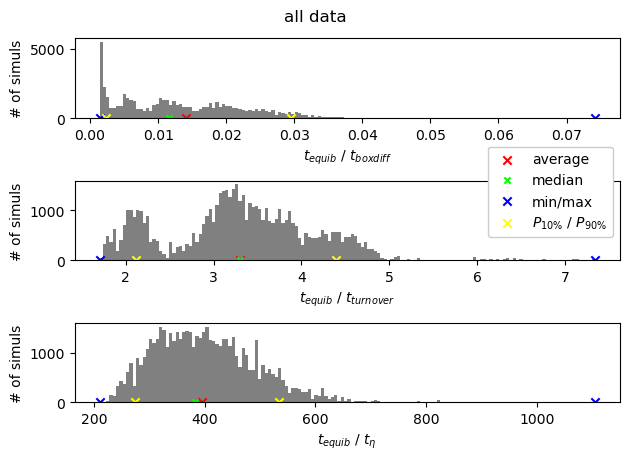

saved all data to /home/julian/BA/img/equib_time_comp_with_all_from_data_all_data.png




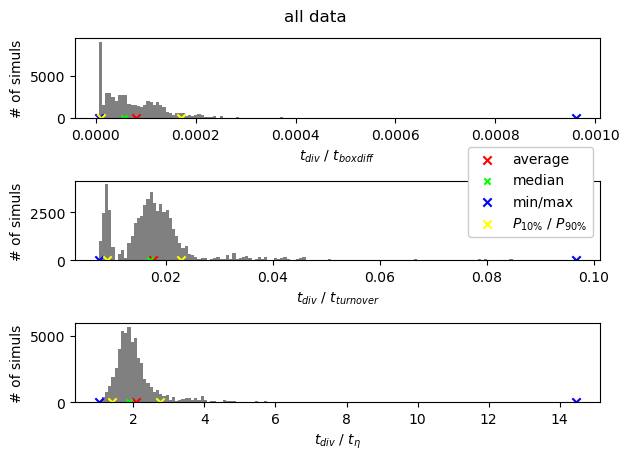

saved all data to /home/julian/BA/img/divergence_time_comp_with_all_from_data_all_data.png




In [25]:
# how long was the equilibriation run?
# how long was the divergence run?

def equib_time_comp(ss, reftime, ax, equib=True):
    if equib:
        data = ss.equib_time/ss[reftime]
        name = "t_equib"
    else:
        data = (ss.end_time)/ss[reftime]
        name = "t_div"
    ax.hist(data, bins= 150, weights=ss.weights, color="grey")
    ax.scatter([np.mean(data)], [0], marker="x", color="red",label="average")
    ax.scatter([np.median(data)], [0], marker="x", s=20, color="lime",label="median")
    ax.scatter([np.min(data), np.max(data)], [0,0], marker="x", color="blue",label="min/max")
    ax.scatter(np.quantile(data,[0.1,0.9]), [0,0], marker="x", color="yellow",label="$P_{10\%}$ / $P_{90\%}$")
    ax.set_ylabel("# of simuls")
    ax.set_xlabel(f"{beautify(name)} / {beautify(reftime)}")

def equib_time_plot(ss, equib=True):
    fig, axes = plt.subplots(3,1, sharey=False)
    axes = list(axes.flatten())
    
    equib_time_comp(ss, "t_eta", axes.pop(), equib)
    equib_time_comp(ss, "t_turnover", axes.pop(), equib)
    equib_time_comp(ss, "t_boxdiff", axes.pop(), equib)
    #equib_time_comp(ss, "kolmo_difft")


    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.legend(bbox_to_anchor=(1,3.3),framealpha=1.0)
    if equib:
        fin(ss.desc, f"equib_time_comp_with_all_from_data_{ss.desc}", suptitle=True)
    else:
        fin(ss.desc, f"divergence_time_comp_with_all_from_data_{ss.desc}", suptitle=True)


for equib in [True, False]:
    equib_time_plot(all_data, equib)
    #equib_time_plot(h1, equib)
    #equib_time_plot(h0, equib)
    #equib_time_plot(e5, equib)
    #equib_time_plot(e2, equib)


created subset << all data >> with  2053  datapoints


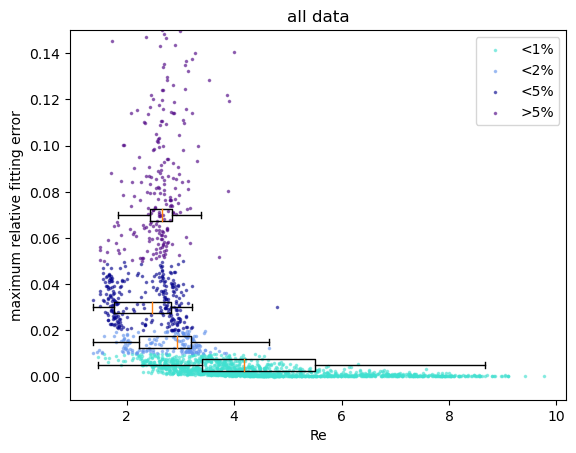

saved all data to /home/julian/BA/img/all_data_re_1Dfiterr.png


created subset << hel=0.0 >> with  727  datapoints


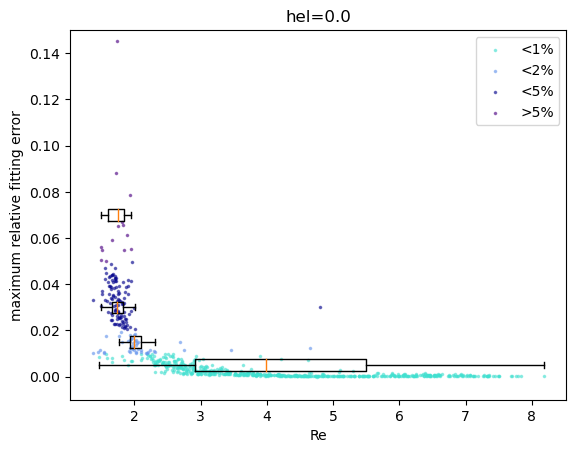

saved hel=0.0 to /home/julian/BA/img/heleq0p0_re_1Dfiterr.png


created subset << hel=1.0 >> with  852  datapoints


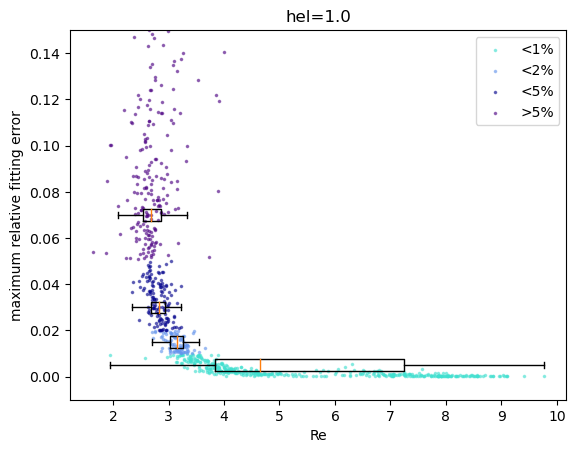

saved hel=1.0 to /home/julian/BA/img/heleq1p0_re_1Dfiterr.png




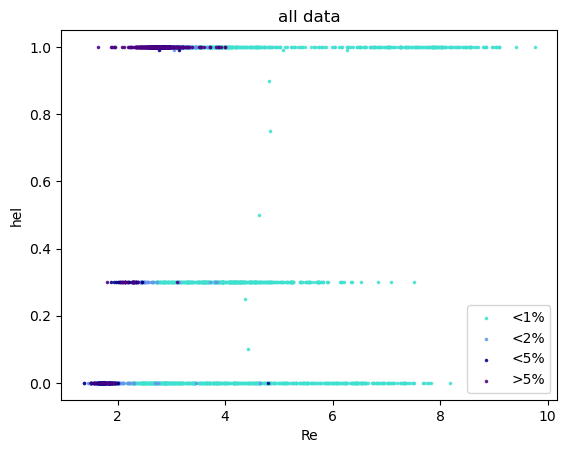

saved all data to /home/julian/BA/img/all_data_re_hel_2Dfiterr.png




In [26]:
# selection biases?

def filt_err(err):
    
    e1 = err < 0.01
    e2 = err < 0.02
    e5 = err < 0.05
    
    return e1, np.logical_and(~e1,e2), np.logical_and(~e2,e5), ~e5

err_mid_points = [0.005,0.015, 0.03, 0.07]
err_colors = ["turquoise", "cornflowerblue", "darkblue", "indigo"]
err_names  = ["<1%", "<2%", "<5%", ">5%"]

def map_1D_to_fiterr(ss, obs):
    
    err_classes = filt_err(ss.fit_err)
    
    boxplotwidths = min(0.005,(max(ss.fit_err)-min(ss.fit_err))/15)
    for filt, color, name, mid_point in zip(err_classes, err_colors, err_names, err_mid_points):
        plt.scatter(ss[obs][filt], ss.fit_err[filt],marker=".",color=color,s=10,alpha=0.5,label=name)
        plt.boxplot(ss[obs][filt],positions=[mid_point],widths=boxplotwidths,vert=False,manage_ticks=False,showfliers=False)
    plt.xlabel(beautify(obs))
    plt.ylabel("maximum relative fitting error")
    plt.ylim(-0.01,0.15)
    plt.legend()
    fin(ss.desc, f"{ss.desc}_{obs}_1Dfiterr")

def map_2D_to_fiterr(ss,obs1,obs2):
    
    if (obs1==obs2):
        return map_1D_to_fiterr(ss,obs1)
    
    err_classes = filt_err(ss.fit_err)
    for filt, color, name in zip(err_classes, err_colors, err_names):
        plt.scatter(ss[obs1][filt],ss[obs2][filt],marker=".",s=10,alpha=0.8,c=color,label=name)
    plt.xlabel(beautify(obs1))
    plt.ylabel(beautify(obs2))
    plt.legend()
    fin(ss.desc, f"{ss.desc}_{obs1}_{obs2}_2Dfiterr")

map_1D_to_fiterr(subset_data(al), "re")
map_1D_to_fiterr(subset_data(hel_zero), "re")
map_1D_to_fiterr(subset_data(hel_one), "re")
map_2D_to_fiterr(all_data, "re", "hel")

In [27]:
# braucht ewig und ist gar nicht mal sooo nuetzlich

#obs_list = ["urms", "re", "v", "f", "hel", "lmb", "lmb_max", "nx", "dt"]
#for data in [subset_data(al), subset_data(hel_one), subset_data(hel_zero)]:
#    for o1, o2 in it.product(obs_list, repeat=2):
#        map_2D_to_fiterr(all_data, o1, o2)

created subset << hel=1.0 >> with  852  datapoints


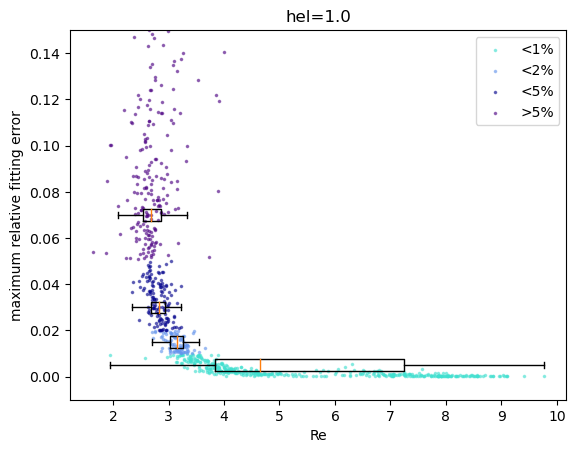

saved hel=1.0 to /home/julian/BA/img/heleq1p0_re_1Dfiterr.png


created subset << hel=0.0 >> with  727  datapoints


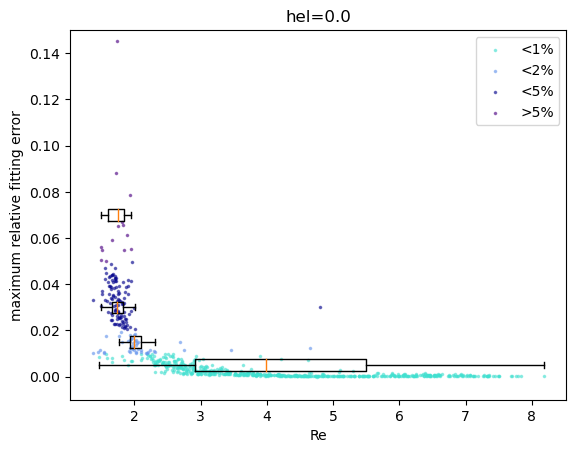

saved hel=0.0 to /home/julian/BA/img/heleq0p0_re_1Dfiterr.png


created subset << hel=1.0 and nx=256 >> with  166  datapoints


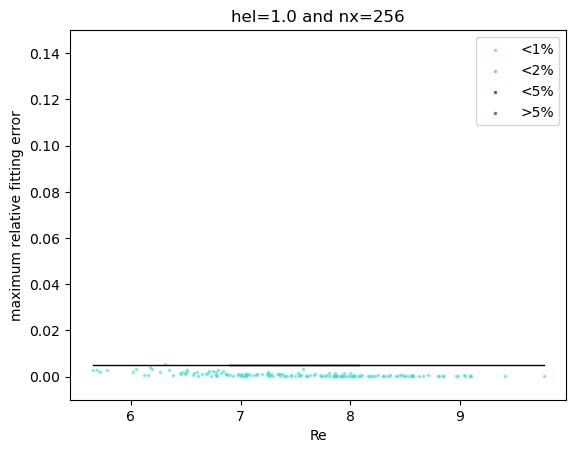

saved hel=1.0 and nx=256 to /home/julian/BA/img/heleq1p0_and_nxeq256_re_1Dfiterr.png




In [28]:
map_1D_to_fiterr(subset_data(hel_one), "re")
map_1D_to_fiterr(subset_data(hel_zero), "re")
map_1D_to_fiterr(subset_data(hel_one, nx_256), "re")

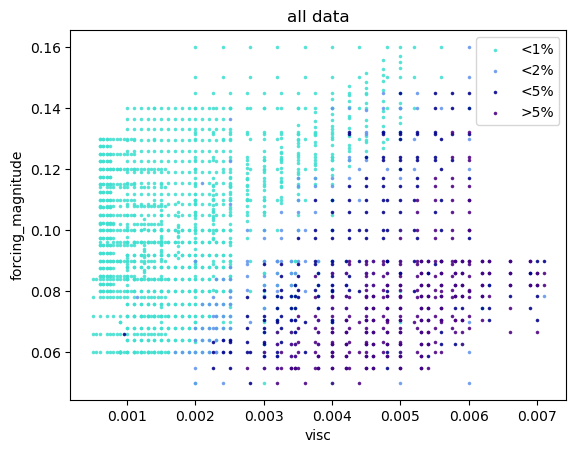

saved all data to /home/julian/BA/img/all_data_v_f_2Dfiterr.png




In [29]:
map_2D_to_fiterr(all_data, "v", "f")

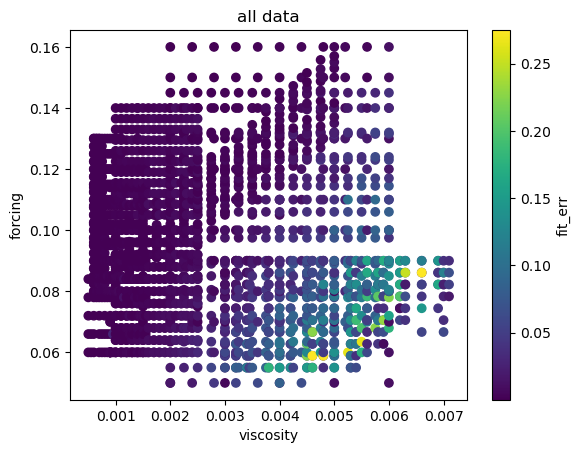

saved all data to /home/julian/BA/img/all_data_fit_err_map_from_input.png




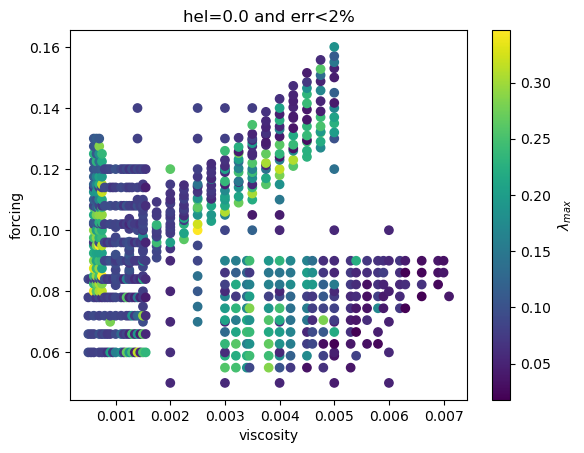

saved hel=0.0 and err<2% to /home/julian/BA/img/heleq0p0_and_errlt2perc_lmb_max_map_from_input.png




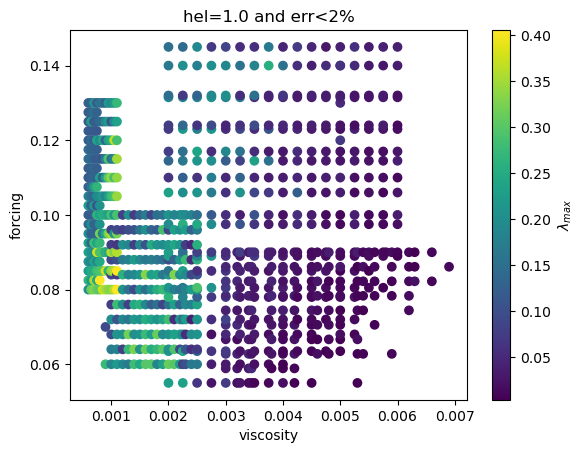

saved hel=1.0 and err<2% to /home/julian/BA/img/heleq1p0_and_errlt2perc_lmb_max_map_from_input.png




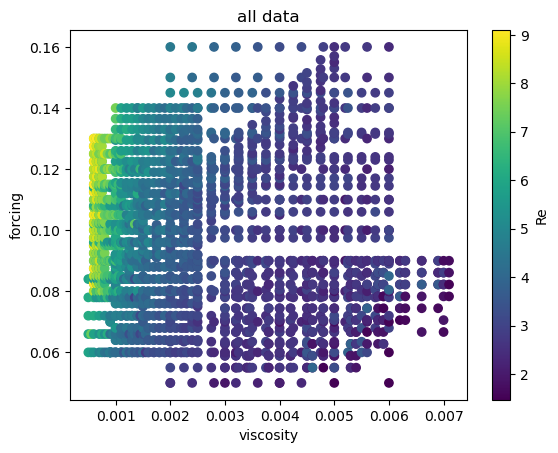

saved all data to /home/julian/BA/img/all_data_re_map_from_input.png




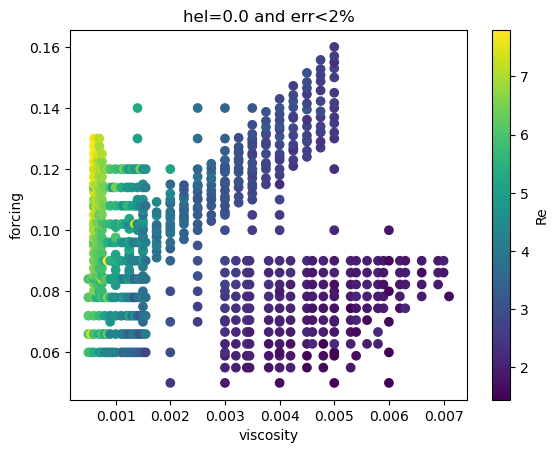

saved hel=0.0 and err<2% to /home/julian/BA/img/heleq0p0_and_errlt2perc_re_map_from_input.png




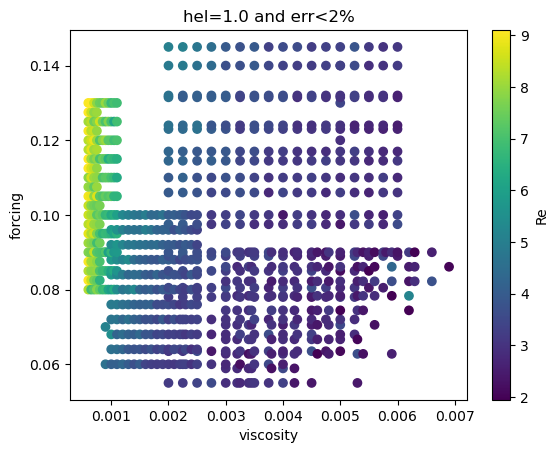

saved hel=1.0 and err<2% to /home/julian/BA/img/heleq1p0_and_errlt2perc_re_map_from_input.png




In [30]:
# plot mapping of input parameters to Re and mach

def map_from_input(ss, obs):
    data = ss[obs]
    sorted_data = np.sort(data)
    vmin = sorted_data[3]
    vmax = sorted_data[-3]
    plt.scatter(ss.v,ss.f,c=data,vmin=vmin, vmax=vmax)
    #plt.plot(v,v*17+0.07)
    #plt.plot(v,v*11+0.085)
    #plt.plot(v,v*17+0.065)
    plt.ylabel("forcing")
    plt.xlabel("viscosity")
    ticks = np.linspace(int(vmin), int(vmax+1), 10)
    ticks = np.array([round(tick,3) for tick in ticks])
    cbar = plt.colorbar()
    cbar.set_label(beautify(obs))
    #cbar.set_ticks(ticks)
    #cbar.set_ticklabels(ticks)
    fin(ss.desc, f"{ss.desc}_{obs}_map_from_input")

map_from_input(all_data, "fit_err")
#map_from_input(h0, "re")
map_from_input(h0, "lmb_max")
#map_from_input(h1, "re")
map_from_input(h1, "lmb_max")

map_from_input(all_data, "re")
map_from_input(h0, "re")
map_from_input(h1, "re")

In [31]:
def make_re_mach_plot(ss,obs_z,**kwargs):
    return make_averaged_scatter_plot(ss,obs_x="re",obs_y="urms",obs_z=obs_z, **kwargs)
def make_averaged_scatter_plot(ss,obs_x,obs_y,obs_z,resolution=50):
    
    ox = ss[obs_x]
    oy = ss[obs_y] # use this definition of mach-number
    scatter = ss[obs_z]
    weights = ss.weights
    map2o = anh.LocalAvg(ox,oy,scatter,weights)
    name=obs_z
    
    xmin = np.min(ox)*0.8
    xmax = np.max(ox)*1.05
    ymin = np.min(oy)*0.8
    ymax = np.max(oy)*1.05
    
    def finalize_plot(name):
        cbar = plt.colorbar()
        cbar.set_label(beautify(obs_z))
        plt.xlim(xmin, xmax)
        plt.ylim(ymin, ymax)
        plt.title(name)
        plt.xlabel(beautify(obs_x))
        plt.ylabel(beautify(obs_y))
        fin(name, f"{name}_x{obs_x}_y{obs_y}_avg_scatter")

    xgrid =np.linspace(xmin, xmax, resolution)
    ygrid =np.linspace(ymin, ymax, resolution)
    x1 = map2o.calc_on_grid(xgrid,ygrid,r=0.2,min_weight=10,max_r_inc=0)
    x1 = npma.masked_array(x1, x1==-11)
    
    datacopy = np.copy(scatter)
    k = 10
    vmin = datacopy[np.argpartition(datacopy, k)[k]]
    vmax = datacopy[np.argpartition(datacopy, len(datacopy)-k)[-k]]
    print(vmin, vmax)
    #vmin, vmax = np.min(x1), np.max(x1)
    
    plt.pcolormesh(xgrid,ygrid,x1.T, cmap="rainbow", vmin=vmin, vmax=vmax)
    
    #data
    #plt.scatter(re[filt],mach[filt], c="black", marker='+', cmap="rainbow", vmin=vmin, vmax=vmax)
    plt.scatter(ox,oy,c="white", marker='o', s=9)
    plt.scatter(ox,oy,c="black", marker='o', s=5)
    plt.scatter(ox,oy,c=scatter, marker='o', s=3, cmap="rainbow", vmin=vmin, vmax=vmax)
    
    finalize_plot(beautify(name)+" from data: " +ss.desc)
    
    #map

# make horizontal cuts through a

0.023502291515489722 0.10203643675759284


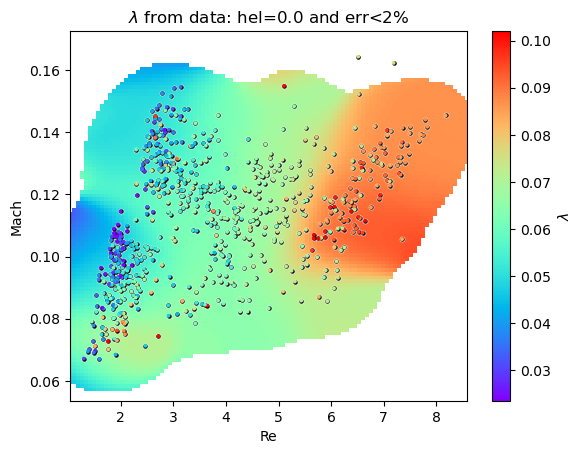

saved $\lambda$ from data: hel=0.0 and err<2% to /home/julian/BA/img/lambda_from_data__heleq0p0_and_errlt2perc_xre_yurms_avg_scatter.png


0.004074302825365104 0.12022688457864106


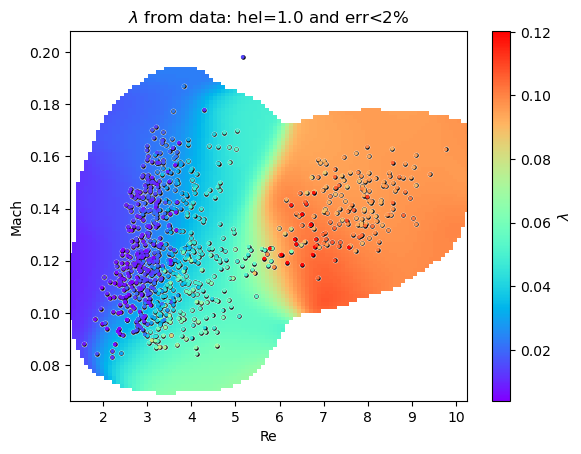

saved $\lambda$ from data: hel=1.0 and err<2% to /home/julian/BA/img/lambda_from_data__heleq1p0_and_errlt2perc_xre_yurms_avg_scatter.png


0.030183667477674724 0.3144248139531237
Cant handle character: "{"
Cant handle character: "}"


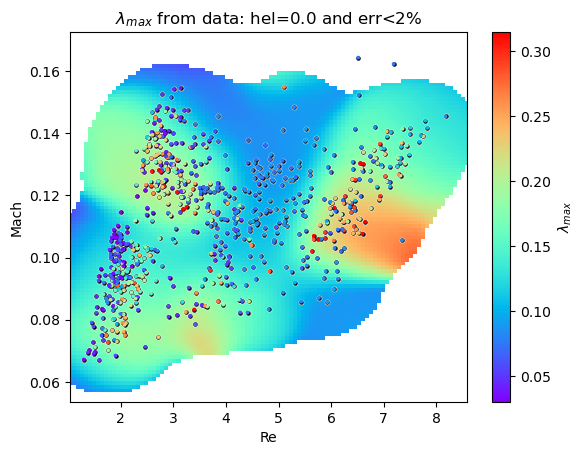

saved $\lambda$$_{max}$ from data: hel=0.0 and err<2% to /home/julian/BA/img/lambda_max_from_data__heleq0p0_and_errlt2perc_xre_yurms_avg_scatter.png


0.004437459662941201 0.3612596923452815
Cant handle character: "{"
Cant handle character: "}"


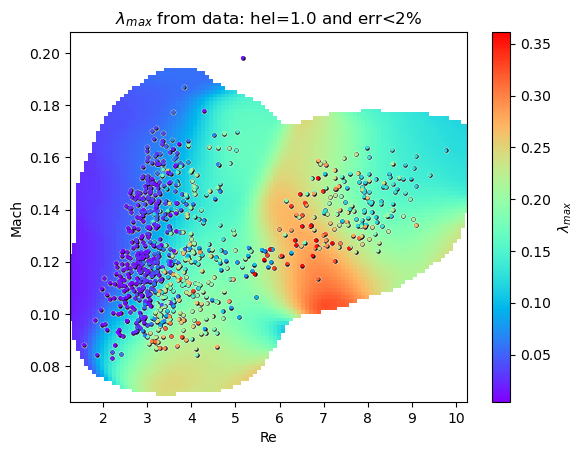

saved $\lambda$$_{max}$ from data: hel=1.0 and err<2% to /home/julian/BA/img/lambda_max_from_data__heleq1p0_and_errlt2perc_xre_yurms_avg_scatter.png




In [32]:
reso = 100
for obs in ["lmb","lmb_max"]:
    for h in [h0,h1]:
        make_re_mach_plot(h,obs,resolution=reso)

0.023502291515489722 0.10203643675759284


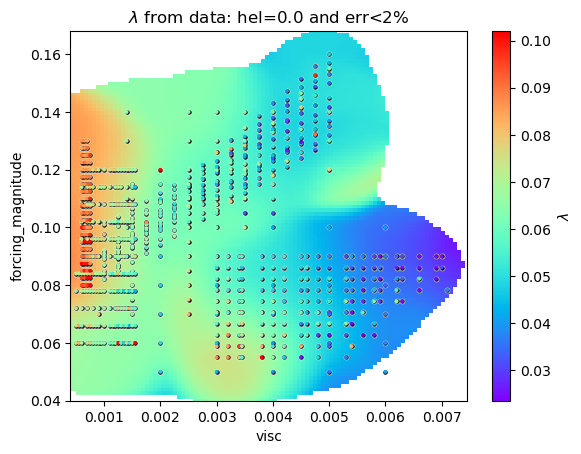

saved $\lambda$ from data: hel=0.0 and err<2% to /home/julian/BA/img/lambda_from_data__heleq0p0_and_errlt2perc_xv_yf_avg_scatter.png


0.004074302825365104 0.12022688457864106


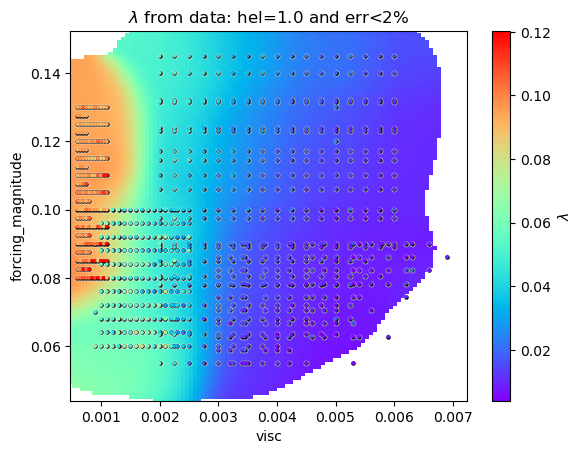

saved $\lambda$ from data: hel=1.0 and err<2% to /home/julian/BA/img/lambda_from_data__heleq1p0_and_errlt2perc_xv_yf_avg_scatter.png


0.030183667477674724 0.3144248139531237
Cant handle character: "{"
Cant handle character: "}"


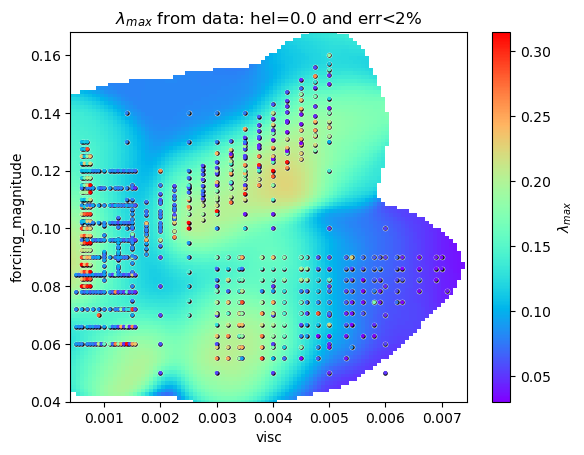

saved $\lambda$$_{max}$ from data: hel=0.0 and err<2% to /home/julian/BA/img/lambda_max_from_data__heleq0p0_and_errlt2perc_xv_yf_avg_scatter.png


0.004437459662941201 0.3612596923452815
Cant handle character: "{"
Cant handle character: "}"


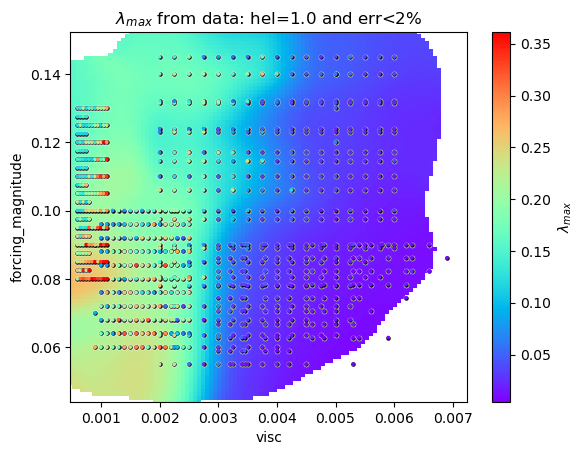

saved $\lambda$$_{max}$ from data: hel=1.0 and err<2% to /home/julian/BA/img/lambda_max_from_data__heleq1p0_and_errlt2perc_xv_yf_avg_scatter.png




In [33]:
for obs in ["lmb","lmb_max"]:
    for h in [h0,h1]:
        make_averaged_scatter_plot(h,"v", "f", obs,resolution=reso)

In [34]:
def scatter_slices(ss,obs_x, obs_color, obs_y, n_colors=5):
    
    ydata = ss[obs_y]
    xdata = ss[obs_x]
    cdata = ss[obs_color]
    
    #Re_numbers = np.linspace(25,225,5)
    c_numbers = list(map(lambda c: round(c,4), np.linspace(np.min(cdata), np.max(cdata), n_colors)))
    for i in range(len(c_numbers)-1):
        cmin = c_numbers[i]
        cmax = c_numbers[i+1]
        c_filt = np.logical_and(cdata >=cmin, cdata < cmax )
        
        c_filtered = cdata[c_filt]
        x_filtered = xdata[c_filt]
        y_filtered = ydata[c_filt]
        
        plt.scatter(x_filtered, y_filtered, label=beautify(obs_color)+" $\in$ ["+str(cmin)+"-"+str(cmax)+")", marker="o",s=3,alpha=1.0)
        
    plt.legend(bbox_to_anchor=(1,1))
    plt.xlabel(beautify(obs_x))
    plt.ylabel(beautify(obs_y))
    ymax = np.quantile(ydata, [0.99])*1.06
    bott, _ = plt.ylim()
    plt.ylim(bottom=bott, top=ymax)
    fin(ss.desc, f"{ss.desc}_slices_{obs_x}xx{obs_y}_with_{obs_color}_slices")
    

def re_mach_slices(ss,obs_y, **kwargs):
    
    return scatter_slices(ss,"re","urms",obs_y,**kwargs)

def mach_re_slices(ss,obs_y,**kwargs):
    
    return scatter_slices(ss,"urms","re",obs_y,**kwargs)
# horizontal cuts

created subset << all data >> with  2053  datapoints


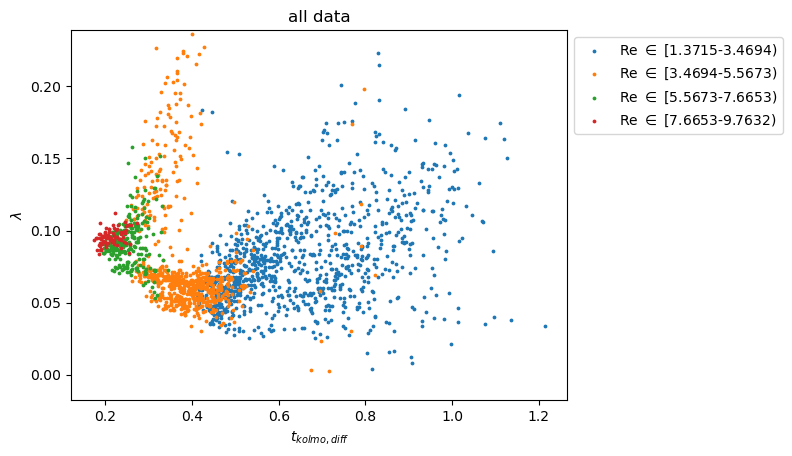

saved all data to /home/julian/BA/img/all_data_slices_kolmo_difftxxlmb_with_re_slices.png




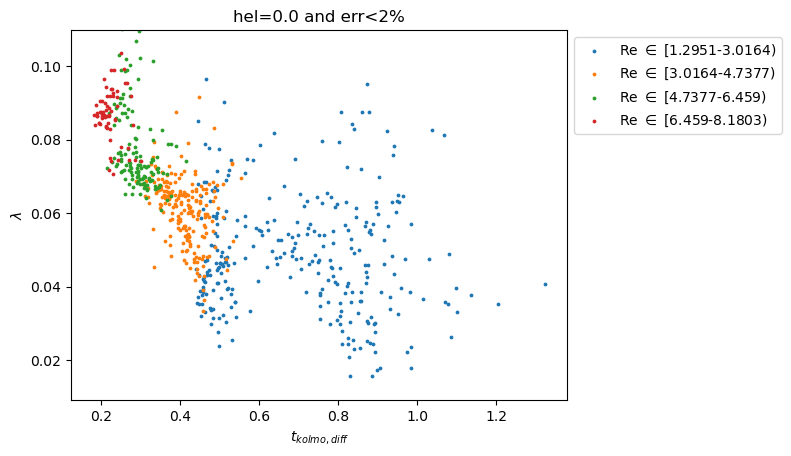

saved hel=0.0 and err<2% to /home/julian/BA/img/heleq0p0_and_errlt2perc_slices_kolmo_difftxxlmb_with_re_slices.png




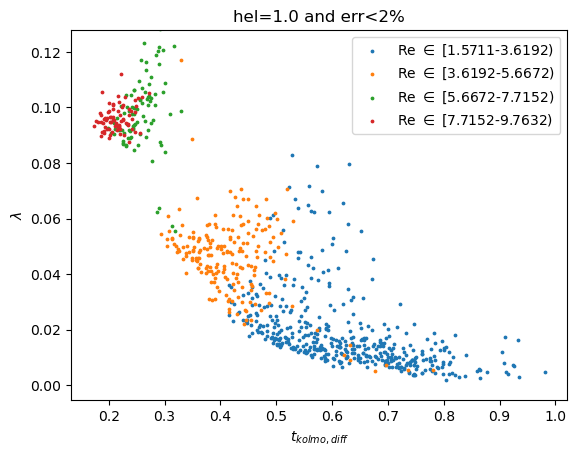

saved hel=1.0 and err<2% to /home/julian/BA/img/heleq1p0_and_errlt2perc_slices_kolmo_difftxxlmb_with_re_slices.png




In [35]:
scatter_slices(subset_data(al), "kolmo_difft", "re", "lmb" )
scatter_slices(h0, "kolmo_difft", "re", "lmb" )
scatter_slices(h1, "kolmo_difft", "re", "lmb" )

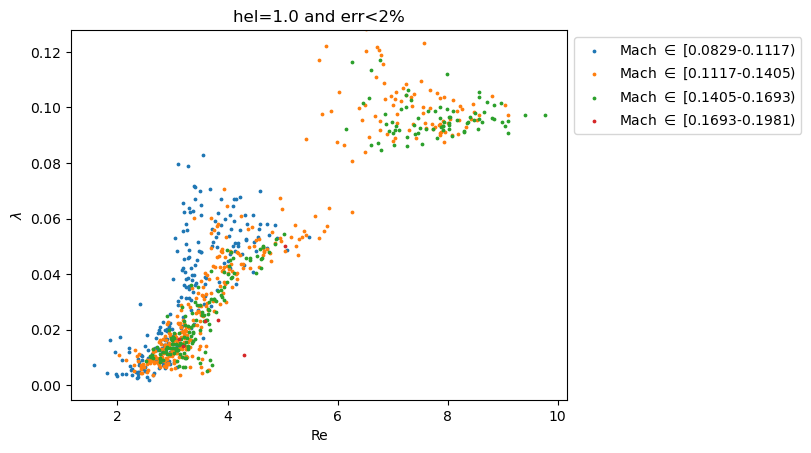

saved hel=1.0 and err<2% to /home/julian/BA/img/heleq1p0_and_errlt2perc_slices_rexxlmb_with_urms_slices.png




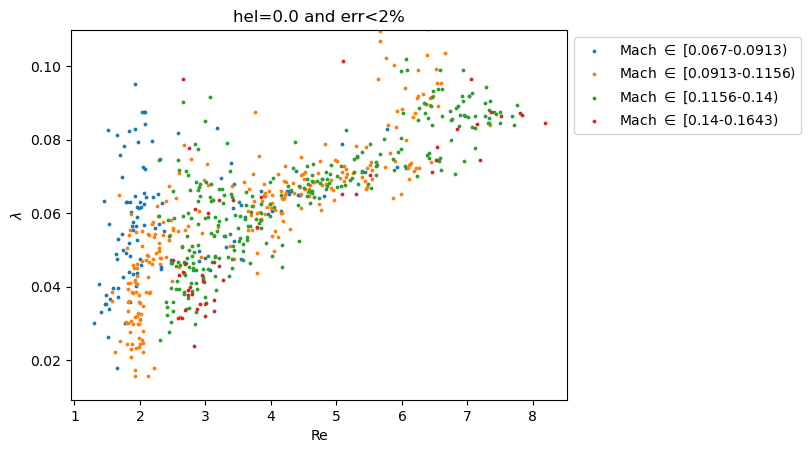

saved hel=0.0 and err<2% to /home/julian/BA/img/heleq0p0_and_errlt2perc_slices_rexxlmb_with_urms_slices.png


created subset << all data >> with  2053  datapoints


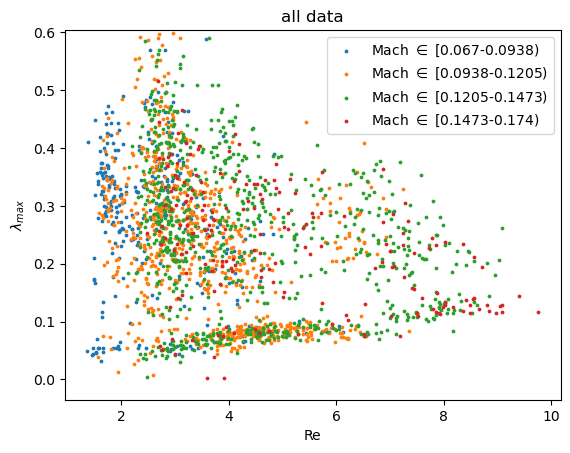

saved all data to /home/julian/BA/img/all_data_slices_rexxlmb_max_with_urms_slices.png


created subset << all data >> with  2053  datapoints


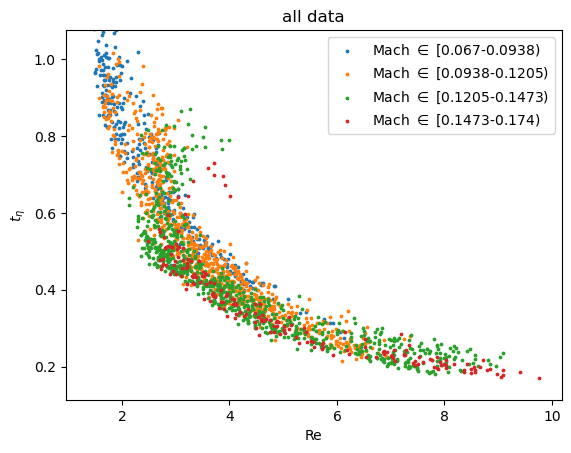

saved all data to /home/julian/BA/img/all_data_slices_rexxt_eta_with_urms_slices.png


created subset << all data >> with  2053  datapoints


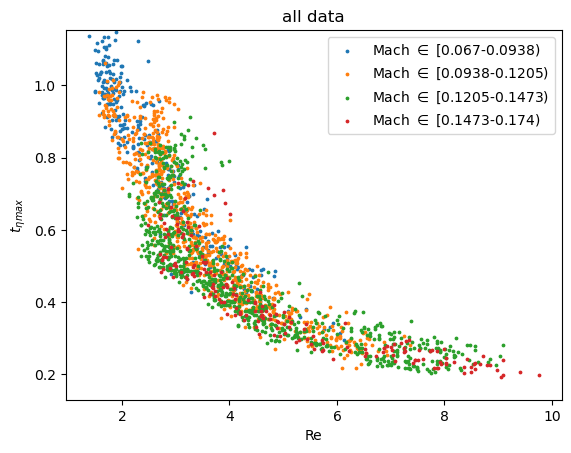

saved all data to /home/julian/BA/img/all_data_slices_rexxt_eta_max_with_urms_slices.png


created subset << all data >> with  2053  datapoints


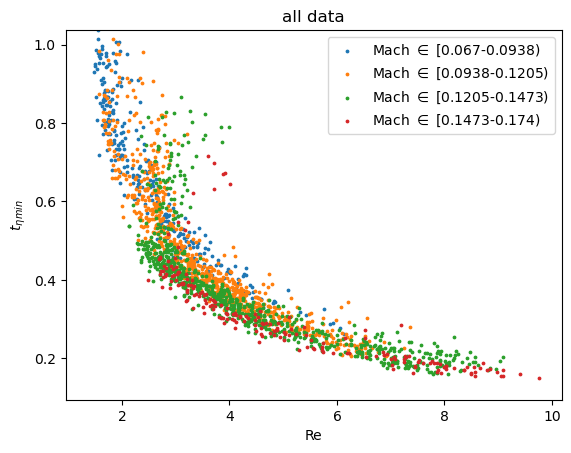

saved all data to /home/julian/BA/img/all_data_slices_rexxt_eta_min_with_urms_slices.png




In [36]:
scatter_slices(h1, "re", "urms", "lmb")
scatter_slices(h0, "re", "urms", "lmb")
re_mach_slices(subset_data(al), "lmb_max")
re_mach_slices(subset_data(al), "t_eta")
re_mach_slices(subset_data(al), "t_eta_max")
re_mach_slices(subset_data(al), "t_eta_min")

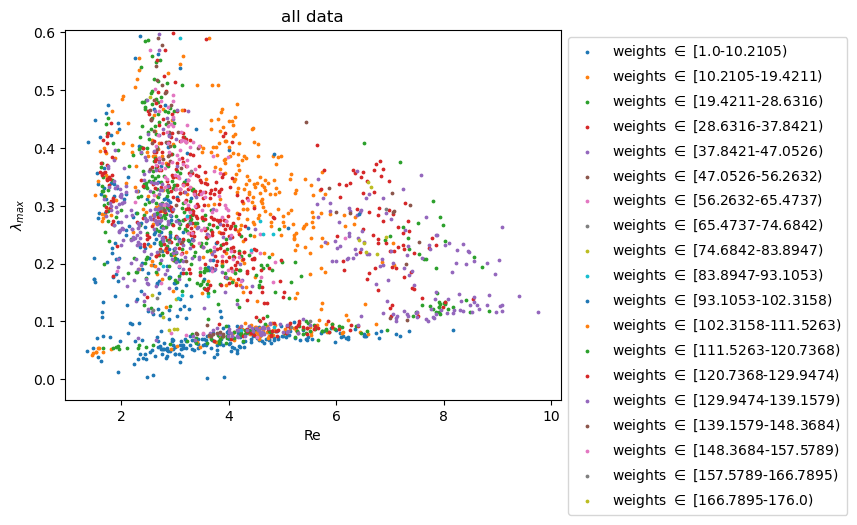

saved all data to /home/julian/BA/img/all_data_slices_rexxlmb_max_with_weights_slices.png




In [37]:


scatter_slices(all_data, "re", "weights", "lmb_max",n_colors=20)

In [38]:
def do_fits(ss, show_fits=True, ylim=None, zc = None):
        
    # fit through lmb(Re) with and without constant C
    # fit with and without weighting
    
    def finalize(log = False):
            
        if ylim is not None:
            plt.ylim(ylim)
        if log:
            plt.yscale("log")
            plt.xscale("log")
        plt.xlabel("Re")
        plt.ylabel("$\lambda$")
        plt.legend(bbox_to_anchor=(0.7,-0.1))
        fin(ss.desc, f"{ss.desc}_fit_results")
        
    #values without a std are not trustworthy because they come from a single simul
    lmb_std_nan_filter = ~np.isnan(ss.lmb_std)
    filt = lmb_std_nan_filter
    
    print(sum(filt), " datapoints with meaningful std")
    re, re_std = ss.re[filt], ss.re_std[filt]
    lmb, lmb_std = ss.lmb[filt], ss.lmb_std[filt]
    
    re_min, re_max = np.min(re),np.max(re)
    #print(re_min, re_max )
    
    unbinned_weight_simple = np.ones(len(re))
    unbinned_weight_sqrt = np.sqrt(ss.weights[filt])
    unbinned_weight_N = ss.weights[filt]

    #xweights: weigh a value higher or lower depending on how many points are in that re-value range
    n_bins = 10
    xbins = np.linspace(re_min,re_max,n_bins,endpoint=False)
    desired_bin_weight = np.ones(n_bins)
    #desired_bin_weight[-1] = 5
    #desired_bin_weight[0] = 5
    actual_bin_weight_simple = np.zeros(n_bins)
    actual_bin_weight_sqrt = np.zeros(n_bins)
    actual_bin_weight_N = np.zeros(n_bins)
    for i in range(len(re)):
        bi = np.searchsorted(xbins,re[i],side="right")
        actual_bin_weight_simple[bi-1] += unbinned_weight_simple[i]
        actual_bin_weight_sqrt[bi-1] += unbinned_weight_sqrt[i]
        actual_bin_weight_N[bi-1] += unbinned_weight_N[i]

    #print(sum(actual_bin_weight==0), " bins are empty")
    actual_bin_weight_simple[actual_bin_weight_simple==0] += np.NaN # avoid divide-by-zero: the value doesnt matter anyways if there is no data in it
    actual_bin_weight_sqrt[actual_bin_weight_sqrt==0] += np.NaN # avoid divide-by-zero: the value doesnt matter anyways if there is no data in it
    actual_bin_weight_N[actual_bin_weight_N==0] += np.NaN # avoid divide-by-zero: the value doesnt matter anyways if there is no data in it
    bin_weight_factor_simple = desired_bin_weight/actual_bin_weight_simple
    bin_weight_factor_sqrt = desired_bin_weight/actual_bin_weight_sqrt
    bin_weight_factor_N = desired_bin_weight/actual_bin_weight_N

    corrected_weights_simple = np.full(len(re), fill_value=np.NaN)
    corrected_weights_sqrt = np.full(len(re), fill_value=np.NaN)
    corrected_weights_N = np.full(len(re), fill_value=np.NaN)
    
    for i in range(len(re)):
        bi = np.searchsorted(xbins,re[i],side="right")
        corrected_weights_simple[i] = unbinned_weight_simple[i]*bin_weight_factor_simple[bi-1]
        corrected_weights_sqrt[i] = unbinned_weight_sqrt[i]*bin_weight_factor_sqrt[bi-1]
        corrected_weights_N[i] = unbinned_weight_N[i]*bin_weight_factor_N[bi-1]
    
    #plot data over everything
    wf = np.full(len(re),fill_value=True)
    #wf = corrected_weights_sqrt > 0.1*np.mean(corrected_weights_sqrt)
    #wf2 = corrected_weights > 0.5*np.mean(corrected_weights) 
    #wf3 = corrected_weights > 0.5*np.max(corrected_weights)
    plt.errorbar(re[wf], lmb[wf],xerr=re_std[wf], yerr=lmb_std[wf], fmt=" ", elinewidth=0.3,zorder=0, alpha=0.5)
    #plt.scatter(re[wf],lmb[wf],s=2,marker="+", c=corrected_weights[wf],zorder=10)
    plt.scatter(re[wf],lmb[wf],s=1.5,marker="+", color="black", zorder=10)
    
    if not show_fits:
        finalize()
        return
    
    if zc is None:
        plot_x = np.linspace(re_min,re_max,500) # for plotting
    else:
        plot_x = np.linspace(zc, re_max*1.1,600)
     
    x = ln(re).reshape(-1,1)
    y = ln(lmb)
    
    
    def fit_with_zero_crossing(x,y,zc,weights,name,do_plot=True):
        
        negative_mask = re > zc
        m = negative_mask
        
        lr = sklearn.linear_model.LinearRegression()
        re_shifted = ln(re[m]-zc).reshape(-1,1)
        assert(np.all(re[m]-zc > 0))
        l = lmb[m]
        assert(np.all(np.isfinite(l)))
        assert(np.all(np.isfinite(re_shifted)))
        lr.fit(re_shifted,ln(l),weights[m])
        
        alpha = np.exp(lr.intercept_)
        delta = lr.coef_[0]
        
        if do_plot:
            plt.plot(plot_x, alpha*(plot_x-zc)**delta ,label=f"{name}, $\delta={round(delta,3)}$, $Re_C = {round(zc,2)}$")
        
        yp = lr.predict(x)
        relerr = (yp-y)/yp
        return np.mean((relerr*weights)**2)
    
    def fit_with_zero_crossing_predict_zc(x,y,weights, name):
        
        def err(zc):
            
            return fit_with_zero_crossing(x,y,zc,weights,name,do_plot=False)
        
        zc_range = [[0,1]]
        
        res = scipy.optimize.differential_evolution(err,zc_range)
        assert(res.success)
        
        zc_best = res.x[0]
        
        fit_with_zero_crossing(x,y,zc_best,weights,name)
        print(f"zc={zc_best}")
        
        
        
    
    def fit_with_C(x,y,weights,name):
        
        # to fit lmb = a*Re**d + C what can we do?
        # find the C that minimizes the error of fitting ln(a) and d to ln(lmb-C) = ln(a) + d*ln(Re) ----> leads to smaller C always being better, delta toward 0
        # !!!!! dont use absolute error, but average relative error -> doesnt solve the problem. Why not?
        # maybe delta really is zero (or very close to it?)
        # MAYBE I SHOULD FIT WITH A DIFFERENT ZEROCROSSING OF THE X!!!!
        # finds the mean squared error of fitting ln(a) and d to match ln(lmb-C) = ln(a) + d*ln(Re)
        def err(C):
            yC = ln(lmb - C)
            lr = sklearn.linear_model.LinearRegression()
            lr.fit(x,yC,weights)
            yp = lr.predict(x)
            relerr = (yp-yC)/yp
            return np.mean((relerr*weights)**2)
        
        Crange = [[-1000000, min(lmb)-0.001]]
        
        
        res = scipy.optimize.differential_evolution(err,Crange)
        
        assert(res.success)
        
        Cbest = res.x[0]
        
        lr = sklearn.linear_model.LinearRegression()
        print(x.shape)
        print(ln(lmb-Cbest).shape)
        print(weights.shape)
        lr.fit(x,ln(lmb-Cbest),weights)
        
        print(lr.coef_, Cbest)
        l = f"{name} weights, C={Cbest}, $\delta$={lr.coef_[0]}"
        plt.plot(plot_x, Cbest+np.exp(lr.predict(ln(plot_x).reshape(-1,1))), label=l)
    
    def fit_simple(x,y,weights,name):
         
        lr = sklearn.linear_model.LinearRegression()
        lr.fit(x,y,weights)
        print(lr.coef_)
        print(np.exp(lr.intercept_))
        print(lr)
        l = f"{name} weights, $\delta$={round(lr.coef_[0],3)}"
        plt.plot(plot_x, np.exp(lr.predict(ln(plot_x).reshape(-1,1))), label=l)
    
        
    
    for name, weights in [
        ("w=N, binned", corrected_weights_N),
        ("w=$\sqrt{N}$, binned", corrected_weights_sqrt),
        ("simple, binned", corrected_weights_simple),
        ("simple, unbinned", unbinned_weight_simple),
        ("w=$\sqrt{N}$, unbinned", unbinned_weight_sqrt),
        ("w=N, unbinned", unbinned_weight_N)
    ]:
        
        #the C fits are pretty useless
        #fit_with_C(x,y,weights,name)
        
        #fit_with_zero_crossing_predict_zc(x,y,weights,name)
        
        if zc is not None:
            fit_with_zero_crossing(x,y,zc,weights,name)
            
        #fit_simple(x,y,weights,name)
        
        #fit_with_C(x,y,weights,name)
       
    
    finalize()

    

{0.0: 1.2158203125, 0.3: 2.0263671875, 1.0: 1.1181640625}
691  datapoints with meaningful std


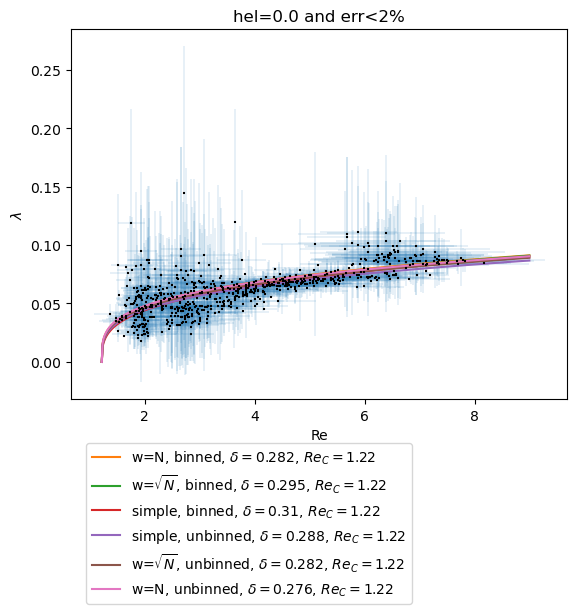

saved hel=0.0 and err<2% to /home/julian/BA/img/heleq0p0_and_errlt2perc_fit_results.png


455  datapoints with meaningful std


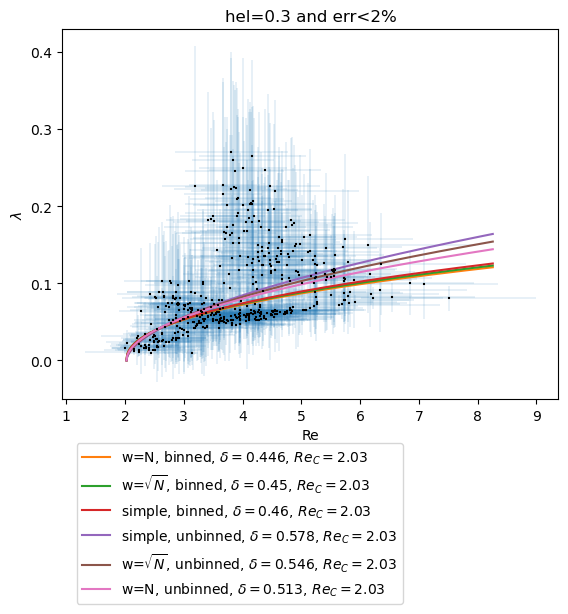

saved hel=0.3 and err<2% to /home/julian/BA/img/heleq0p3_and_errlt2perc_fit_results.png


780  datapoints with meaningful std


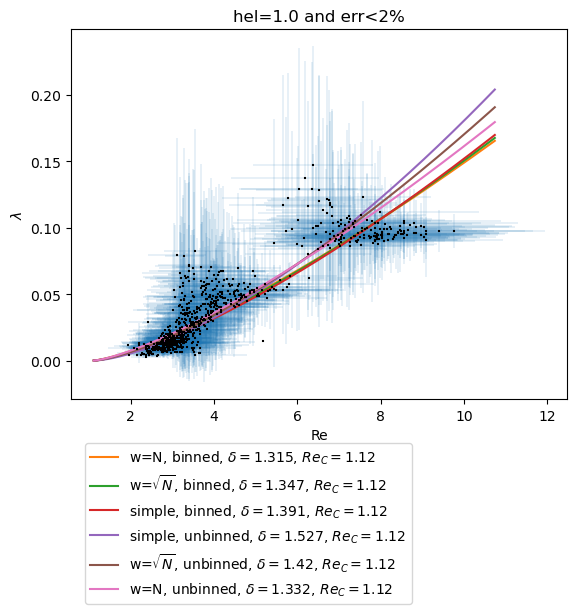

saved hel=1.0 and err<2% to /home/julian/BA/img/heleq1p0_and_errlt2perc_fit_results.png




In [39]:
print(hel2Re_c)
do_fits(h0, zc = hel2Re_c[0.0])
do_fits(hs, zc = hel2Re_c[0.3])
do_fits(h1, zc = hel2Re_c[1.0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


691  datapoints with meaningful std


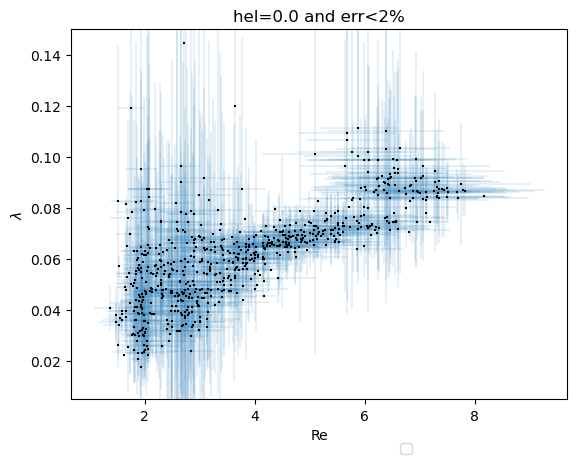

saved hel=0.0 and err<2% to /home/julian/BA/img/heleq0p0_and_errlt2perc_fit_results.png


780  datapoints with meaningful std


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


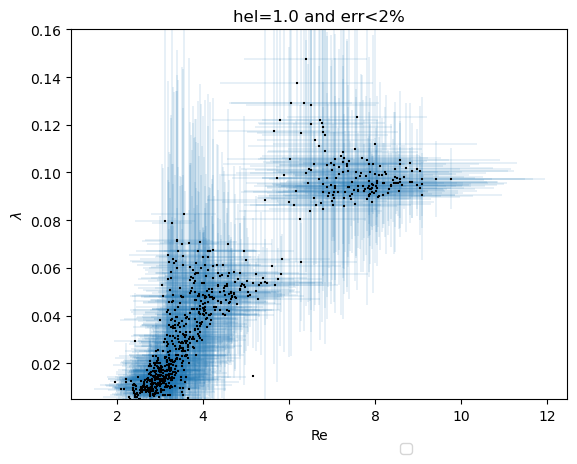

saved hel=1.0 and err<2% to /home/julian/BA/img/heleq1p0_and_errlt2perc_fit_results.png




In [40]:
do_fits(h0,ylim=[0.005,0.15])
do_fits(h1,ylim=[0.005,0.16])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


created subset << hel=1.0 >> with  852  datapoints
844  datapoints with meaningful std


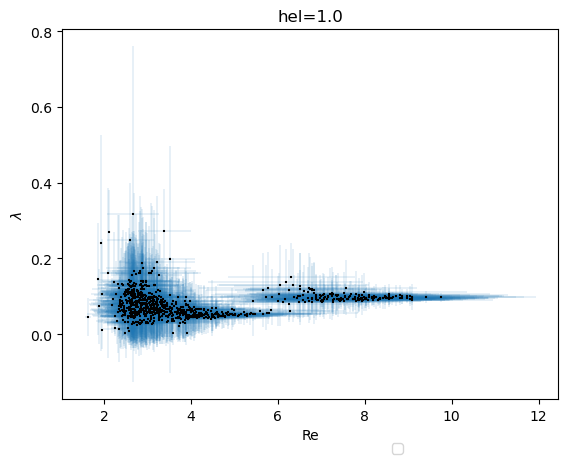

saved hel=1.0 to /home/julian/BA/img/heleq1p0_fit_results.png




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


created subset << hel=1.0 and err<5% and nx=128 >> with  662  datapoints
635  datapoints with meaningful std


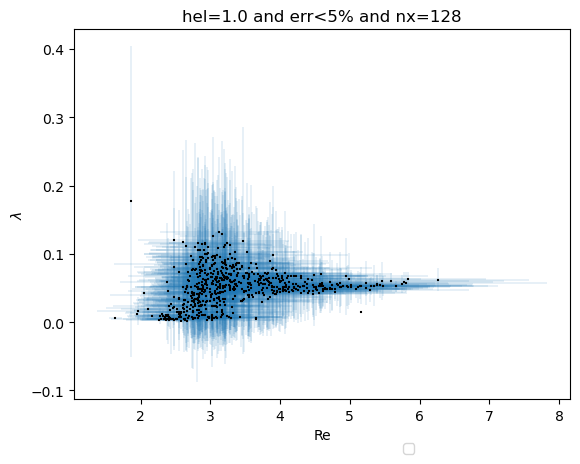

saved hel=1.0 and err<5% and nx=128 to /home/julian/BA/img/heleq1p0_and_errlt5perc_and_nxeq128_fit_results.png




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


created subset << hel=1.0 and nx=256 >> with  166  datapoints
166  datapoints with meaningful std


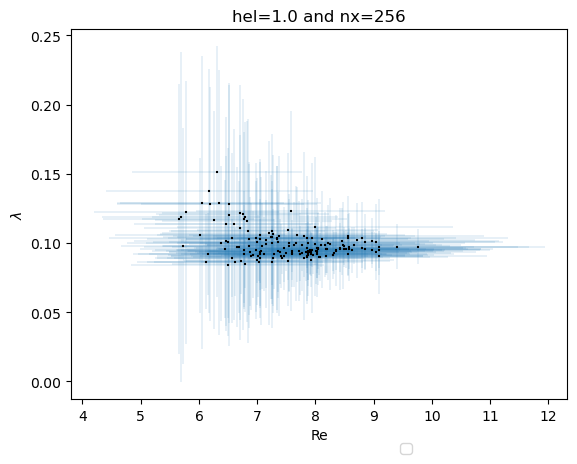

saved hel=1.0 and nx=256 to /home/julian/BA/img/heleq1p0_and_nxeq256_fit_results.png




In [41]:
ss = subset_data(hel_one)
do_fits(ss,show_fits=True)
ss = subset_data(hel_one,err5,nx_128)
do_fits(ss,show_fits=True)
ss = subset_data(hel_one,nx_256)
do_fits(ss,show_fits=True)

In [42]:
import ipywidgets as widgets
#from ipywidgets import #interact, interact_manual

In [43]:
re_manual_plot = np.linspace(10,300,400)
def manual_plot(fun):
    lmb = fun(re_manual_plot)
    plt.plot(re_manual_plot, lmb, color="orange", label="MANUAL")

ss = h1
re_dat = ss.re
lmb_dat = ss.lmb

def manual_plot_compare(delta, C):
    plt.gca().clear()
    plt.close()
    alpha = 0.1/(250**delta + C)
    manual_plot(lambda x: alpha*(x**delta + C))
    plt.scatter(re_dat, lmb_dat, color="blue", marker="+", s=5, label="data")
    plt.legend()
    plt.show()


In [44]:
#interact(manual_plot_compare, delta=0.5, C=-3.0)

In [45]:
plt.show()
print("first show")
plt.close()
plt.show()

first show


In [46]:
#interact(manual_plot_compare, delta=0.3, C=-1.0)

In [47]:
def f(x,y):
    print(x, y)

#interact(f,x=2, y=3)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


created subset << err<2% and hel=1.0 >> with  807  datapoints
780  datapoints with meaningful std


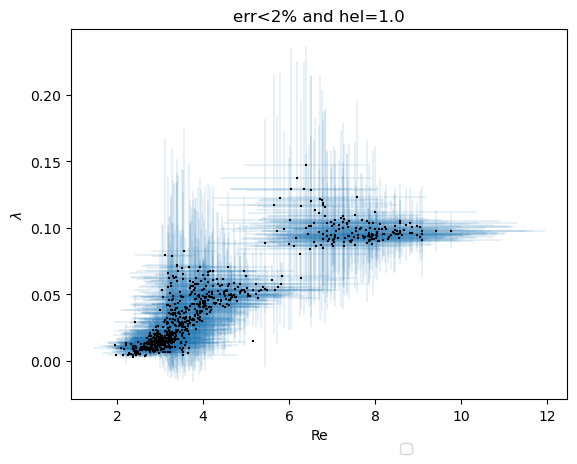

saved err<2% and hel=1.0 to /home/julian/BA/img/errlt2perc_and_heleq1p0_fit_results.png




In [48]:
#%matplotlib widget
do_fits(subset_data( err2, hel_one))

    

218  datapoints with meaningful std


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


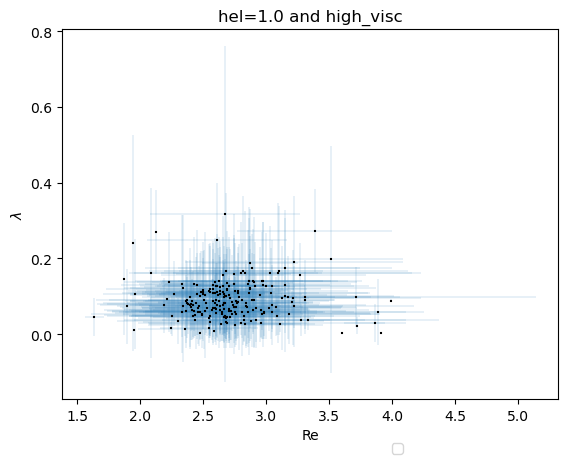

saved hel=1.0 and high_visc to /home/julian/BA/img/heleq1p0_and_high_visc_fit_results.png




In [49]:
do_fits(h1hv, show_fits=True)

In [50]:
def colored_errbar_plot(ss, obs_x, obs_y, obs_color):
    
    cdata = ss[obs_color]
    xdata = ss[obs_x]
    ydata = ss[obs_y]
    
    if False:
        xdata = [ss[obs_x+"_q25"],ss[obs_x+"_q75"]]
        ydata = [ss[obs_y+"_q25"],ss[obs_y+"_q75"]]
        plt.errorbar(xdata,ydata,xerr=xerr,yerr=yerr,c="grey",alpha=0.1,zorder=0)
    plt.scatter(xdata,ydata,c=cdata,marker="+",s=5,cmap="cividis")
    cbar = plt.colorbar()
    cbar.set_label(obs_color)
    plt.xlabel(beautify(obs_x))
    plt.ylabel(beautify(obs_y))
    fin(ss.desc, f"{ss.desc}_errbar_{obs_x}xxx{obs_y}_with_color_{obs_color}")

In [51]:
print(err2)
print(df)
subset_data(err2)

(0        False
2        False
3         True
4        False
5        False
         ...  
68354     True
68355     True
68356     True
68357     True
68358     True
Name: fit_err, Length: 55410, dtype: bool, 'err<2%')
             re      urms     t_eta   hel        v        f       lmb  \
0      2.722410  0.138698  0.548100  0.99  0.00500  0.12000  0.002719   
2      3.735063  0.171251  0.493262  0.99  0.00500  0.12000  0.053671   
3      3.789220  0.126628  0.411860  0.00  0.00225  0.10475  0.059225   
4      4.774534  0.114587  0.563334  1.00  0.00200  0.05500  0.251339   
5      2.732680  0.082866  0.616509  1.00  0.00200  0.06350  0.171124   
...         ...       ...       ...   ...      ...      ...       ...   
68354  2.158996  0.109698  0.555891  0.00  0.00400  0.11800  0.025783   
68355  3.970128  0.165577  0.448683  0.00  0.00400  0.12000  0.316574   
68356  2.945407  0.136816  0.487539  0.00  0.00400  0.12300  0.046561   
68357  2.422093  0.120735  0.514823  0.00  0.00400 

{'re': array([5.92981724, 6.05627499, 6.13089153, ..., 1.82457236, 1.99479103,
        1.57603218]),
 'urms': array([0.08563022, 0.08974187, 0.09317147, ..., 0.10638285, 0.11450082,
        0.09393396]),
 't_eta': array([0.31325199, 0.29127366, 0.2735623 , ..., 0.87416116, 0.82498965,
        0.98232183]),
 'hel': array([0., 0., 0., ..., 0., 0., 0.]),
 'v': array([0.0005, 0.0005, 0.0005, ..., 0.007 , 0.007 , 0.0071]),
 'f': array([0.06   , 0.066  , 0.072  , ..., 0.08611, 0.09   , 0.07833]),
 'lmb': array([0.0724605 , 0.07220052, 0.07367377, ..., 0.03003082, 0.02431507,
        0.03848679]),
 'dt': array([0.07023518, 0.06975382, 0.06843685, ..., 0.14013867, 0.1396071 ,
        0.14388988]),
 'nx': array([128., 128., 128., ..., 128., 128., 128.]),
 'dx': array([0.04908739, 0.04908739, 0.04908739, ..., 0.04908739, 0.04908739,
        0.04908739]),
 'fit_err': array([0.00026635, 0.00032454, 0.00043173, ..., 0.0116126 , 0.01156497,
        0.01766676]),
 'eta': array([0.01251063, 0.01206544

created subset << err<2% >> with  1975  datapoints


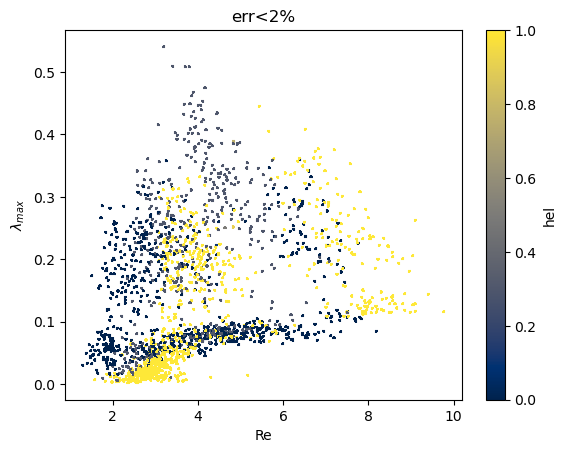

saved err<2% to /home/julian/BA/img/errlt2perc_errbar_rexxxlmb_max_with_color_hel.png


created subset << err<5% >> with  2017  datapoints


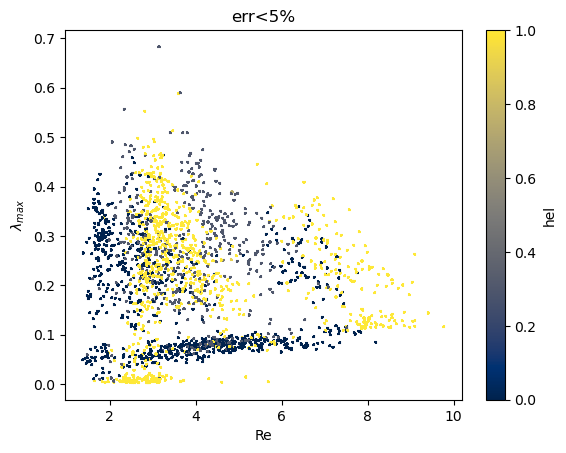

saved err<5% to /home/julian/BA/img/errlt5perc_errbar_rexxxlmb_max_with_color_hel.png


created subset << err<5% >> with  2017  datapoints


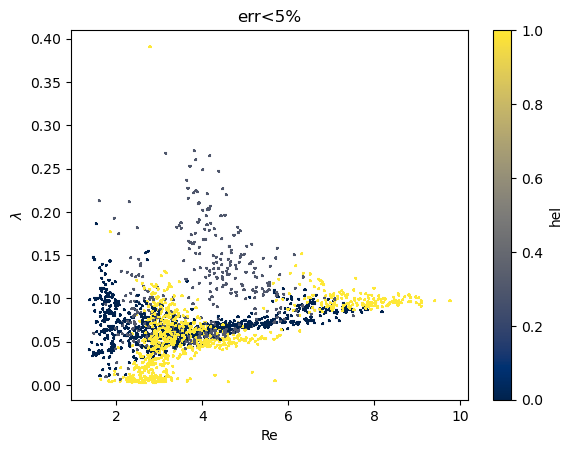

saved err<5% to /home/julian/BA/img/errlt5perc_errbar_rexxxlmb_with_color_hel.png


created subset << hel=1.0 >> with  852  datapoints


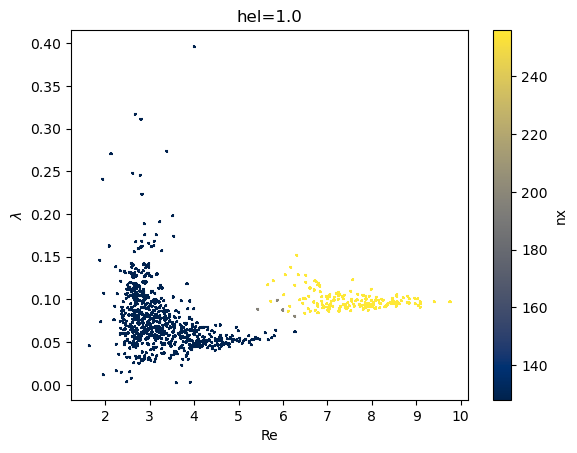

saved hel=1.0 to /home/julian/BA/img/heleq1p0_errbar_rexxxlmb_with_color_nx.png


created subset << hel=1.0 and nx=128 >> with  690  datapoints


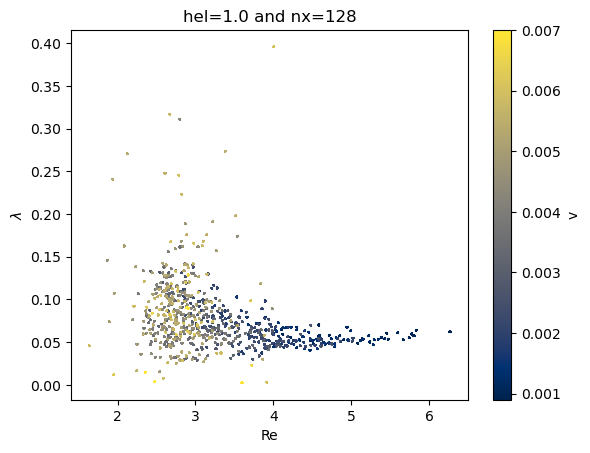

saved hel=1.0 and nx=128 to /home/julian/BA/img/heleq1p0_and_nxeq128_errbar_rexxxlmb_with_color_v.png


created subset << hel=1.0 and nx=256 >> with  166  datapoints


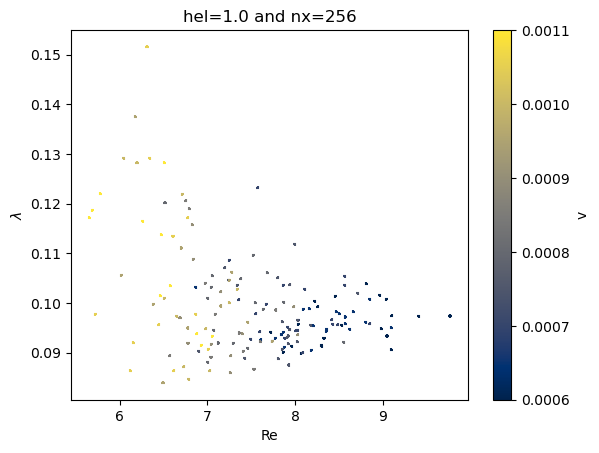

saved hel=1.0 and nx=256 to /home/julian/BA/img/heleq1p0_and_nxeq256_errbar_rexxxlmb_with_color_v.png




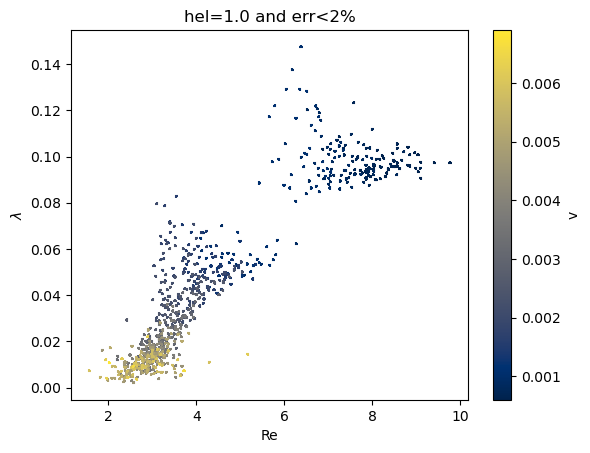

saved hel=1.0 and err<2% to /home/julian/BA/img/heleq1p0_and_errlt2perc_errbar_rexxxlmb_with_color_v.png




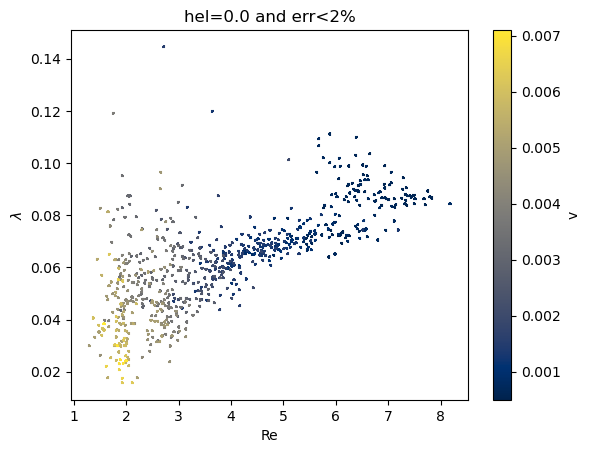

saved hel=0.0 and err<2% to /home/julian/BA/img/heleq0p0_and_errlt2perc_errbar_rexxxlmb_with_color_v.png




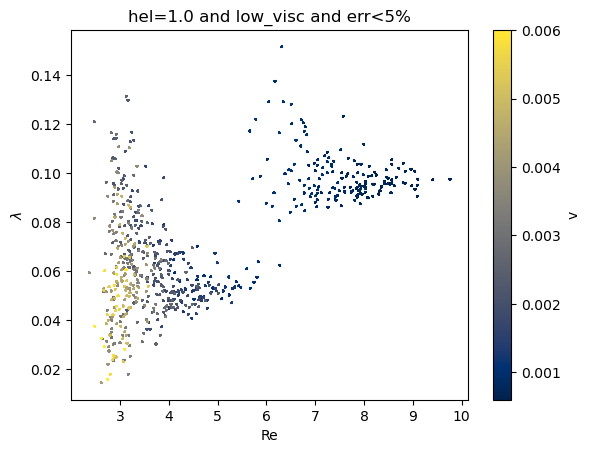

saved hel=1.0 and low_visc and err<5% to /home/julian/BA/img/heleq1p0_and_low_visc_and_errlt5perc_errbar_rexxxlmb_with_color_v.png




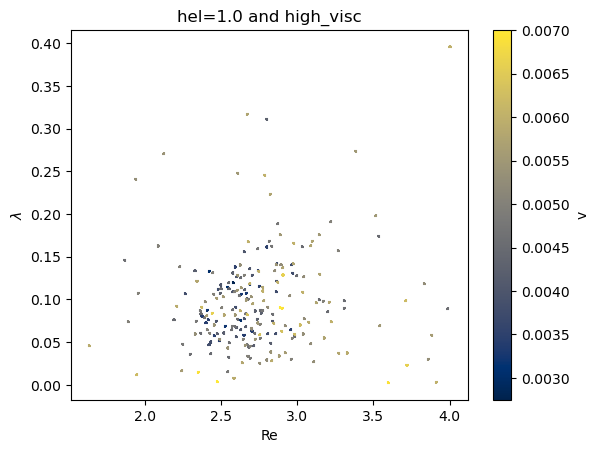

saved hel=1.0 and high_visc to /home/julian/BA/img/heleq1p0_and_high_visc_errbar_rexxxlmb_with_color_v.png




In [52]:
colored_errbar_plot(subset_data(err2), "re", "lmb_max", "hel")
colored_errbar_plot(subset_data(err5), "re", "lmb_max", "hel")
colored_errbar_plot(subset_data(err5), "re", "lmb", "hel")
colored_errbar_plot(subset_data(hel_one), "re", "lmb", "nx")
colored_errbar_plot(subset_data(hel_one, nx_128), "re", "lmb", "v")
colored_errbar_plot(subset_data(hel_one, nx_256), "re", "lmb", "v")
colored_errbar_plot(h1, "re", "lmb", "v")
colored_errbar_plot(h0, "re", "lmb", "v")
colored_errbar_plot(h1lv, "re", "lmb", "v")
colored_errbar_plot(h1hv, "re", "lmb", "v")

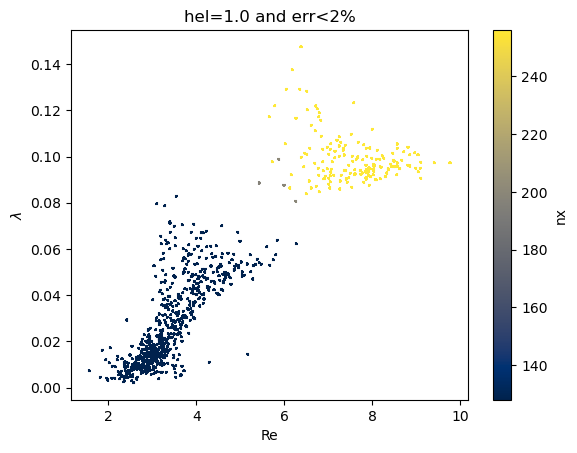

saved hel=1.0 and err<2% to /home/julian/BA/img/heleq1p0_and_errlt2perc_errbar_rexxxlmb_with_color_nx.png




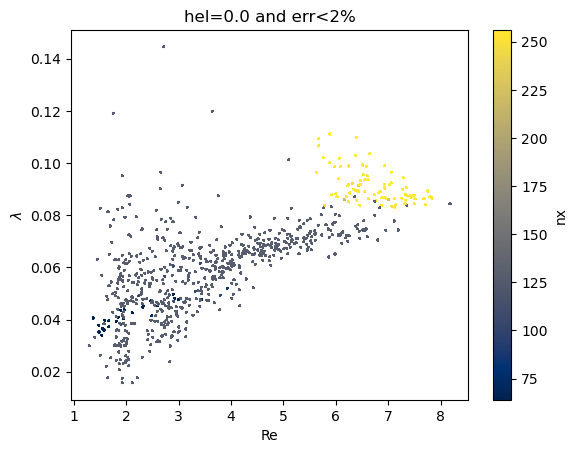

saved hel=0.0 and err<2% to /home/julian/BA/img/heleq0p0_and_errlt2perc_errbar_rexxxlmb_with_color_nx.png




In [53]:
colored_errbar_plot(h1, "re", "lmb", "nx")
colored_errbar_plot(h0, "re", "lmb", "nx")

In [54]:
def lyap_vs_timescale(ss, tau, tau_name, lmb_mod="", obs_color=None, cmap="cividis", invert=False, x_clip_low=0.0, x_clip_high=0.0, clip_high=0.01, xlim=None):
    
    if obs_color is not None:
        color = ss[obs_color]
    else:
        color = "green"
    lmb_show = ss["lmb_"+lmb_mod] if lmb_mod else ss.lmb
    #dimensional lyapunov exponent
    print("######################\n###### WHY THE LMB_MIN ################3\n ########################")
    dl = ss.lmb_min/ss.t_eta
    
    if invert:
        tau = 1/tau
        plt.xlabel(tau_name)
    else:
        plt.xlabel("("+tau_name + r")$^{-1}$")
    
    if clip_high > 0:
        max_dl = np.quantile(dl, 1-clip_high)
        filt = (dl<=max_dl)
        dl = dl[filt]
        tau = tau[filt]
        if obs_color is not None:
            color = color[filt]
    if x_clip_high > 0:
        max_x = np.quantile(1/tau, 1-x_clip_high)
        filt = (1/tau<=max_x)
        dl = dl[filt]
        tau = tau[filt]
        if obs_color is not None:
            color = color[filt]
    if x_clip_low > 0:
        min_x = np.quantile(1/tau, x_clip_low)
        filt = (1/tau>= min_x)
        dl = dl[filt]
        tau = tau[filt]
        if obs_color is not None:
            color = color[filt]
    
    plt.scatter(1/tau, dl,marker=".",s=4.5,c="black",cmap=cmap)
    plt.scatter(1/tau, dl,marker=".",s=3.5,c=color,cmap=cmap)
    
    plt.ylabel(f" Dimensional Lyapunov exponent {beautify(lmb_mod)} (in units of 1/time)")
    if obs_color is not None:
        cbar = plt.colorbar()
        cbar.set_label(beautify(obs_color))
    fin(beautify(tau_name) + " from data: (" + ss.desc + ")", f"difftime_comp_{tau_name}{lmb_mod}_from_data_{ss.desc}_with_color_{obs_color}")
    
    
def lyap_vs_numerical(ss, **kwargs):
    
    return lyap_vs_timescale(ss,ss.dt,"numerical timestep",**kwargs)

def lyap_vs_kolmogorov(ss, **kwargs):
    
    return lyap_vs_timescale(ss,ss.t_eta,"$t_\eta$",**kwargs)

def lyap_vs_celltime(ss, **kwargs):
    
    return lyap_vs_timescale(ss,ss.dx/ss.urms, "time between gridcells", **kwargs)

def lyap_vs_difftime(ss, **kwargs):
    
    return lyap_vs_timescale(ss,(2*np.pi)/ss.v, "diffusion time (defined via integral scale)", **kwargs)

def lyap_vs_kolmo_difftime(ss,**kwargs):
    
    return lyap_vs_timescale(ss,(ss.urms*ss.t_eta)**2/ss.v, "diffusion time (defined via Kolmogorov scale)", **kwargs)

def lyap_vs_dx_difftime(ss,**kwargs):
    
    return lyap_vs_timescale(ss,(ss.dx)**2/ss.v, "diffusion time (defined through the numerical $\Delta x$)", **kwargs)

created subset << err<5% >> with  2017  datapoints
######################
###### WHY THE LMB_MIN ################3
 ########################


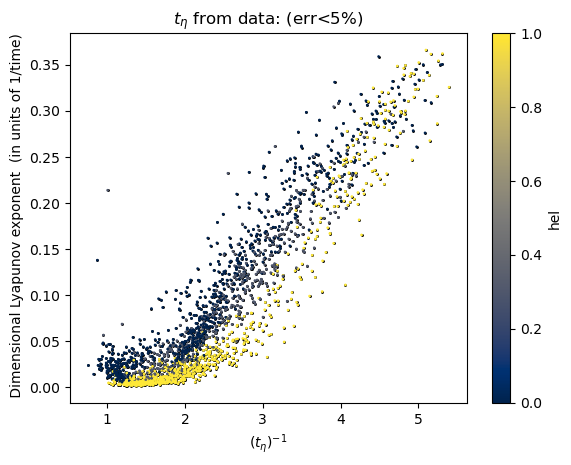

saved $t_\eta$ from data: (err<5%) to /home/julian/BA/img/difftime_comp_t_eta_from_data_errlt5perc_with_color_hel.png


######################
###### WHY THE LMB_MIN ################3
 ########################


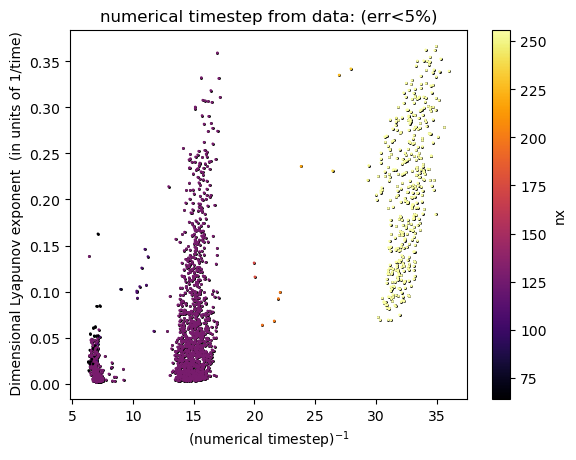

saved numerical timestep from data: (err<5%) to /home/julian/BA/img/difftime_comp_numerical_timestep_from_data_errlt5perc_with_color_nx.png


######################
###### WHY THE LMB_MIN ################3
 ########################


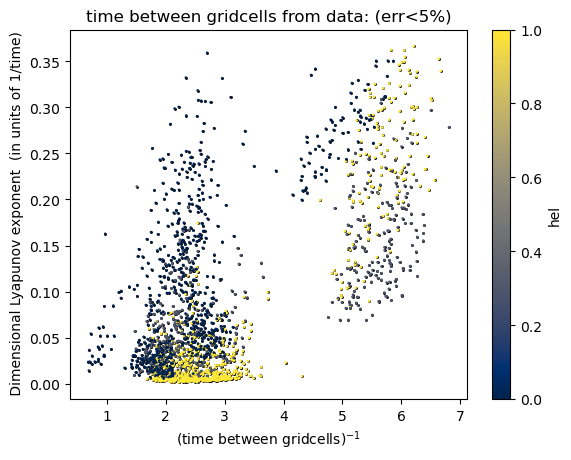

saved time between gridcells from data: (err<5%) to /home/julian/BA/img/difftime_comp_time_between_gridcells_from_data_errlt5perc_with_color_hel.png


######################
###### WHY THE LMB_MIN ################3
 ########################


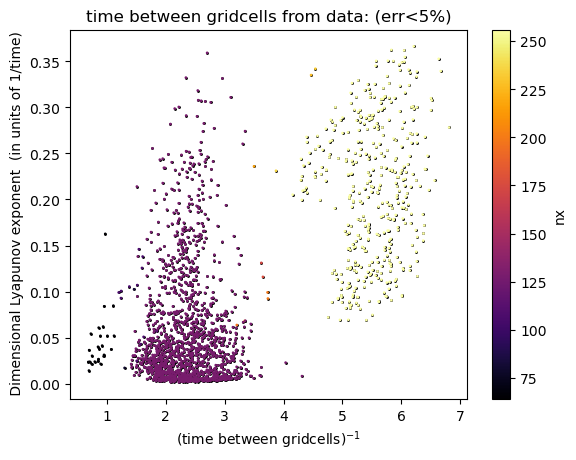

saved time between gridcells from data: (err<5%) to /home/julian/BA/img/difftime_comp_time_between_gridcells_from_data_errlt5perc_with_color_nx.png


######################
###### WHY THE LMB_MIN ################3
 ########################
Cant handle character: "("
Cant handle character: ")"


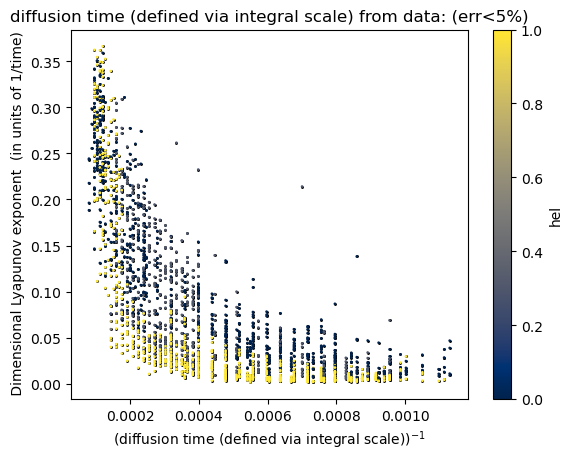

saved diffusion time (defined via integral scale) from data: (err<5%) to /home/julian/BA/img/difftime_comp_diffusion_time_defined_via_integral_scale_from_data_errlt5perc_with_color_hel.png


######################
###### WHY THE LMB_MIN ################3
 ########################
Cant handle character: "("
Cant handle character: ")"


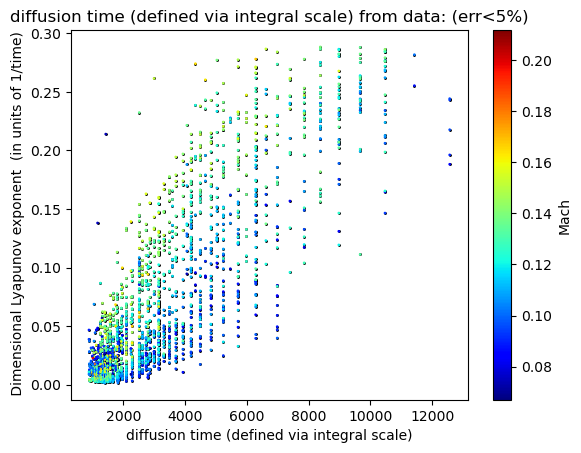

saved diffusion time (defined via integral scale) from data: (err<5%) to /home/julian/BA/img/difftime_comp_diffusion_time_defined_via_integral_scale_from_data_errlt5perc_with_color_urms.png


######################
###### WHY THE LMB_MIN ################3
 ########################
Cant handle character: "("
Cant handle character: ")"


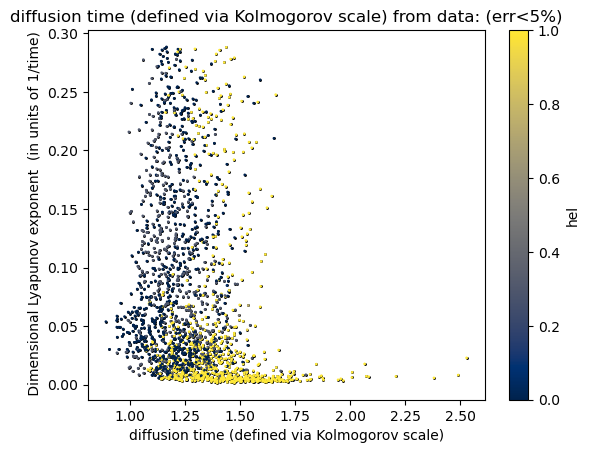

saved diffusion time (defined via Kolmogorov scale) from data: (err<5%) to /home/julian/BA/img/difftime_comp_diffusion_time_defined_via_Kolmogorov_scale_from_data_errlt5perc_with_color_hel.png


######################
###### WHY THE LMB_MIN ################3
 ########################
Cant handle character: "("
Cant handle character: ")"


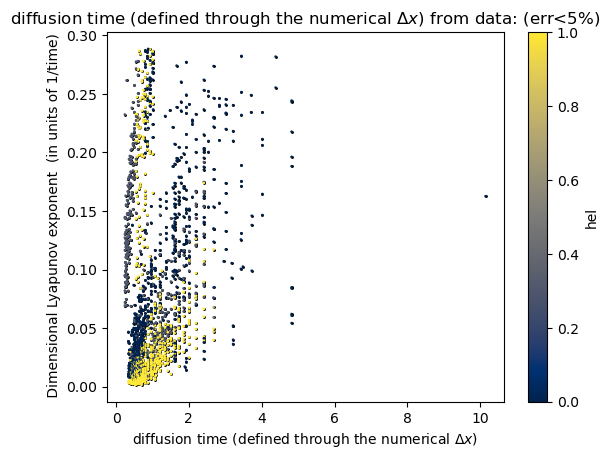

saved diffusion time (defined through the numerical $\Delta x$) from data: (err<5%) to /home/julian/BA/img/difftime_comp_diffusion_time_defined_through_the_numerical_Delta_x_from_data_errlt5perc_with_color_hel.png




In [55]:
ss = subset_data(err5)
lyap_vs_kolmogorov(ss,obs_color="hel",clip_high=0.01)
lyap_vs_numerical(ss,obs_color="nx",cmap="inferno")
lyap_vs_celltime(ss,obs_color="hel")
lyap_vs_celltime(ss,obs_color="nx",cmap="inferno")
lyap_vs_difftime(ss,obs_color="hel")
lyap_vs_difftime(ss,obs_color="urms",cmap="jet", invert=True,clip_high=0.05)
lyap_vs_kolmo_difftime(ss,obs_color="hel",invert=True,clip_high=0.05)
lyap_vs_dx_difftime(ss,obs_color="hel",invert=True,clip_high=0.05)

######################
###### WHY THE LMB_MIN ################3
 ########################
Cant handle character: "("
Cant handle character: ")"


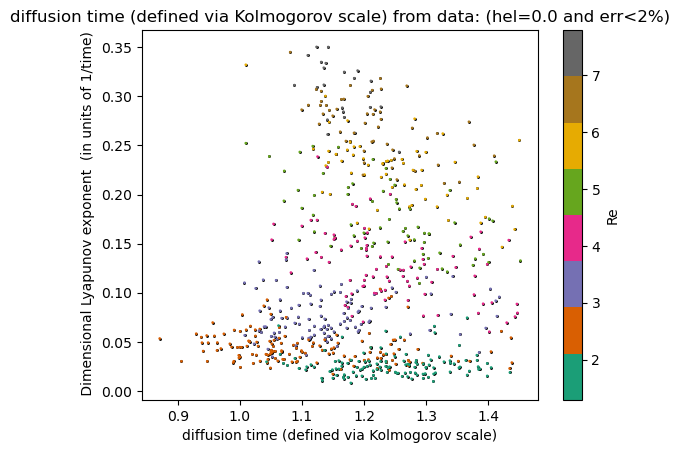

saved diffusion time (defined via Kolmogorov scale) from data: (hel=0.0 and err<2%) to /home/julian/BA/img/difftime_comp_diffusion_time_defined_via_Kolmogorov_scale_from_data_heleq0p0_and_errlt2perc_with_color_re.png


######################
###### WHY THE LMB_MIN ################3
 ########################
Cant handle character: "("
Cant handle character: ")"


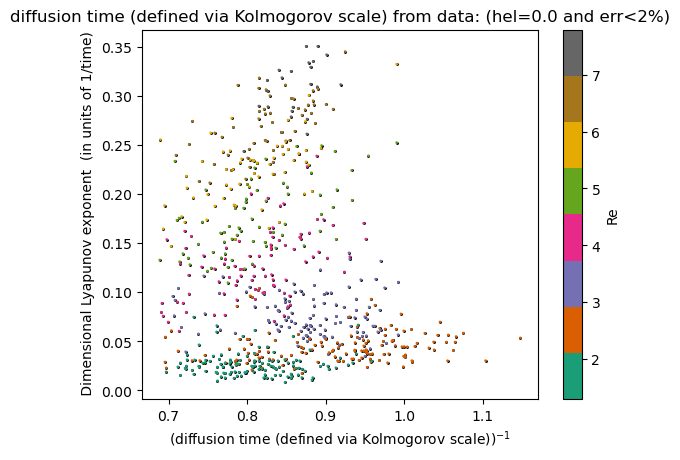

saved diffusion time (defined via Kolmogorov scale) from data: (hel=0.0 and err<2%) to /home/julian/BA/img/difftime_comp_diffusion_time_defined_via_Kolmogorov_scale_from_data_heleq0p0_and_errlt2perc_with_color_re.png




In [56]:
cmap = "Dark2"
ss = h0
lyap_vs_kolmo_difftime(ss,obs_color="re",cmap=cmap,invert=True, x_clip_high=0.03)
lyap_vs_kolmo_difftime(ss,obs_color="re",cmap=cmap,invert=False, x_clip_low=0.03)

created subset << err<5% >> with  2017  datapoints
######################
###### WHY THE LMB_MIN ################3
 ########################


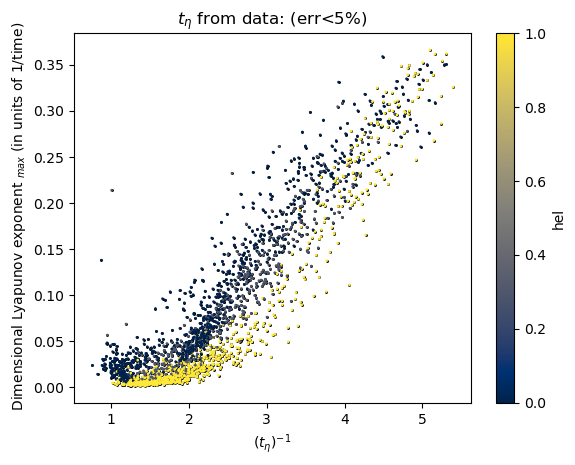

saved $t_\eta$ from data: (err<5%) to /home/julian/BA/img/difftime_comp_t_etamax_from_data_errlt5perc_with_color_hel.png


######################
###### WHY THE LMB_MIN ################3
 ########################


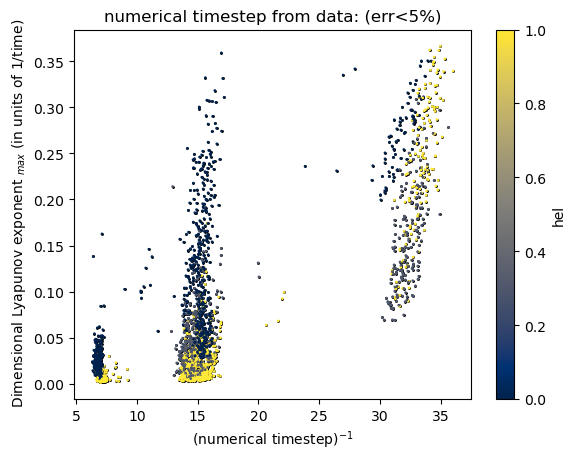

saved numerical timestep from data: (err<5%) to /home/julian/BA/img/difftime_comp_numerical_timestepmax_from_data_errlt5perc_with_color_hel.png


######################
###### WHY THE LMB_MIN ################3
 ########################


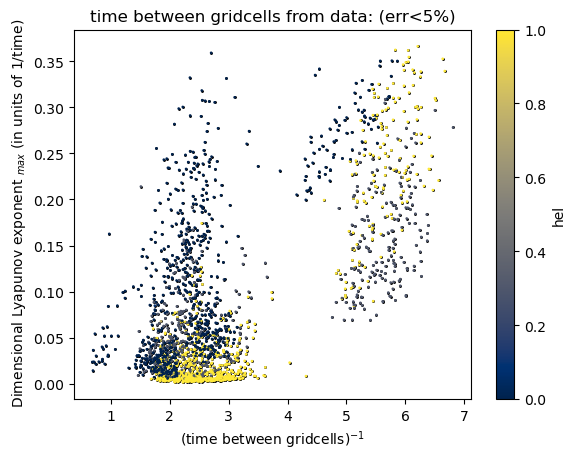

saved time between gridcells from data: (err<5%) to /home/julian/BA/img/difftime_comp_time_between_gridcellsmax_from_data_errlt5perc_with_color_hel.png


######################
###### WHY THE LMB_MIN ################3
 ########################
Cant handle character: "("
Cant handle character: ")"


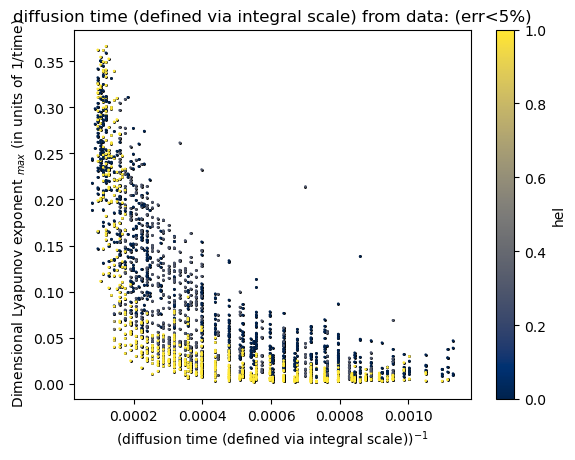

saved diffusion time (defined via integral scale) from data: (err<5%) to /home/julian/BA/img/difftime_comp_diffusion_time_defined_via_integral_scalemax_from_data_errlt5perc_with_color_hel.png


######################
###### WHY THE LMB_MIN ################3
 ########################
Cant handle character: "("
Cant handle character: ")"


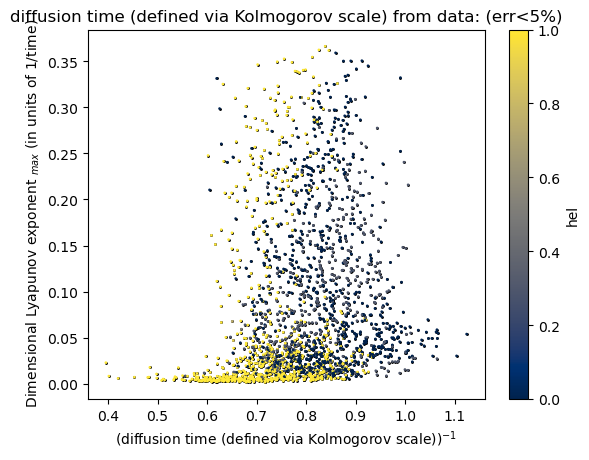

saved diffusion time (defined via Kolmogorov scale) from data: (err<5%) to /home/julian/BA/img/difftime_comp_diffusion_time_defined_via_Kolmogorov_scalemax_from_data_errlt5perc_with_color_hel.png




In [57]:
ss = subset_data(err5)
lyap_vs_kolmogorov(ss,lmb_mod="max",obs_color="hel")
lyap_vs_numerical(ss,lmb_mod="max", obs_color="hel")
lyap_vs_celltime(ss,lmb_mod="max", obs_color="hel")
lyap_vs_difftime(ss,lmb_mod="max", obs_color="hel")
lyap_vs_kolmo_difftime(ss,lmb_mod="max", obs_color="hel")

######################
###### WHY THE LMB_MIN ################3
 ########################


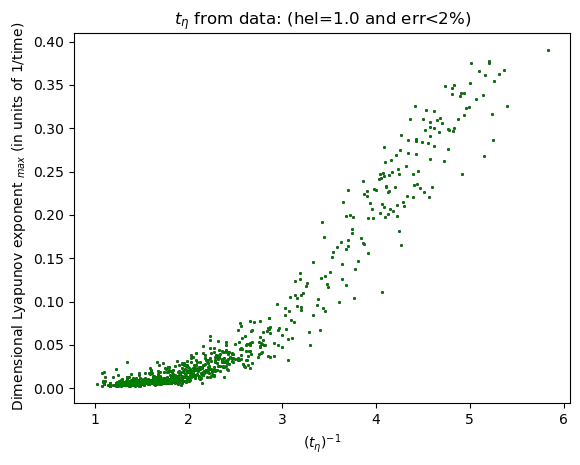

saved $t_\eta$ from data: (hel=1.0 and err<2%) to /home/julian/BA/img/difftime_comp_t_etamax_from_data_heleq1p0_and_errlt2perc_with_color_None.png


######################
###### WHY THE LMB_MIN ################3
 ########################


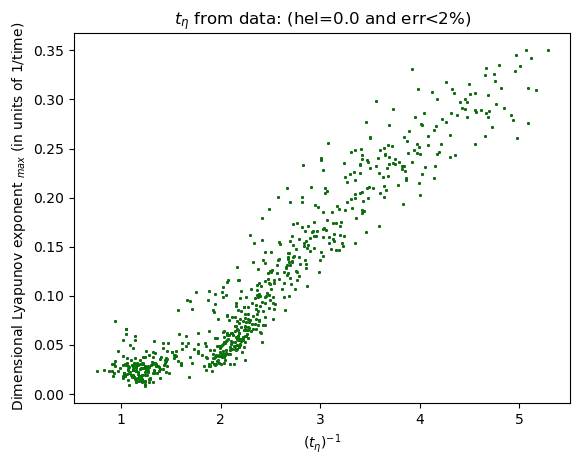

saved $t_\eta$ from data: (hel=0.0 and err<2%) to /home/julian/BA/img/difftime_comp_t_etamax_from_data_heleq0p0_and_errlt2perc_with_color_None.png


######################
###### WHY THE LMB_MIN ################3
 ########################


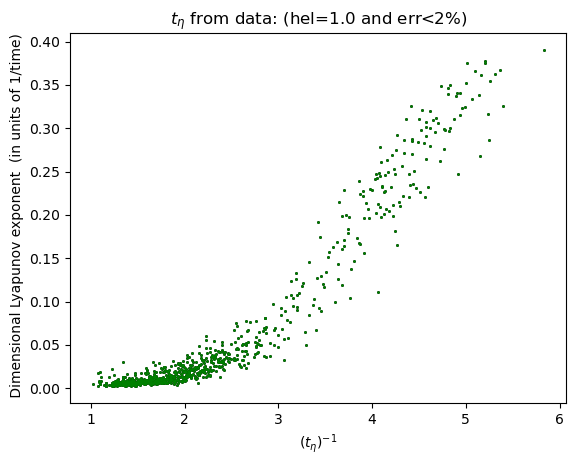

saved $t_\eta$ from data: (hel=1.0 and err<2%) to /home/julian/BA/img/difftime_comp_t_eta_from_data_heleq1p0_and_errlt2perc_with_color_None.png


######################
###### WHY THE LMB_MIN ################3
 ########################


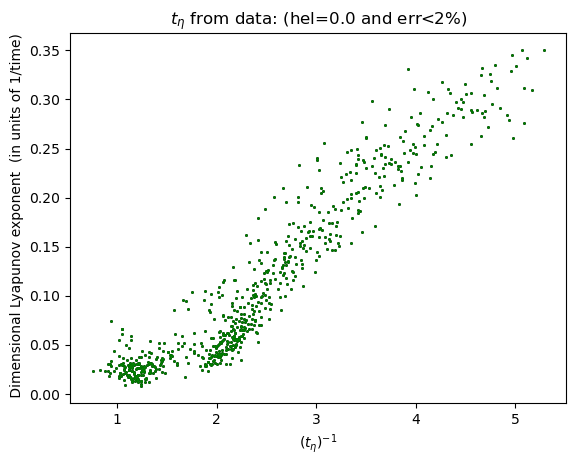

saved $t_\eta$ from data: (hel=0.0 and err<2%) to /home/julian/BA/img/difftime_comp_t_eta_from_data_heleq0p0_and_errlt2perc_with_color_None.png




In [58]:
lyap_vs_kolmogorov(h1,lmb_mod="max")
lyap_vs_kolmogorov(h0,lmb_mod="max")
lyap_vs_kolmogorov(h1,lmb_mod="")
lyap_vs_kolmogorov(h0,lmb_mod="")

In [59]:
# diffusion timescale is also interesting
# diffusion has dimension cm^2 / s (check this)
# construct dependence on nu with the dimension


# a time from the helicity?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


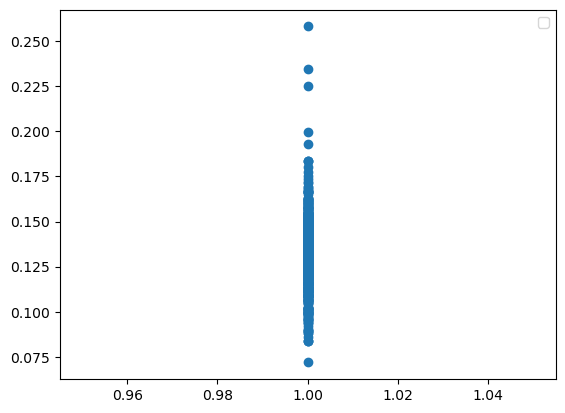

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


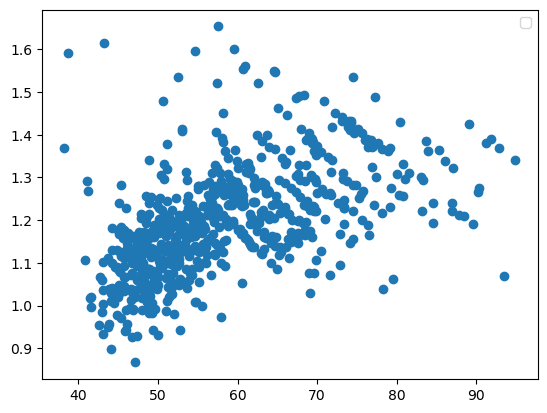

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


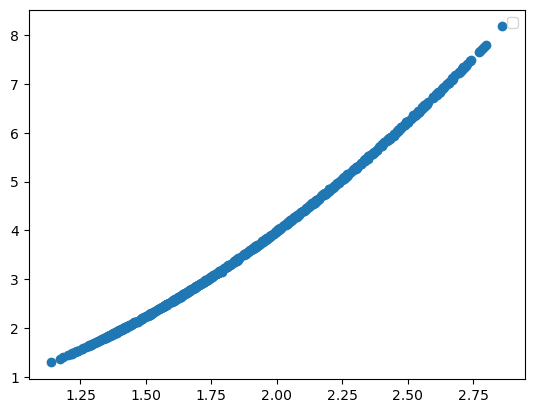

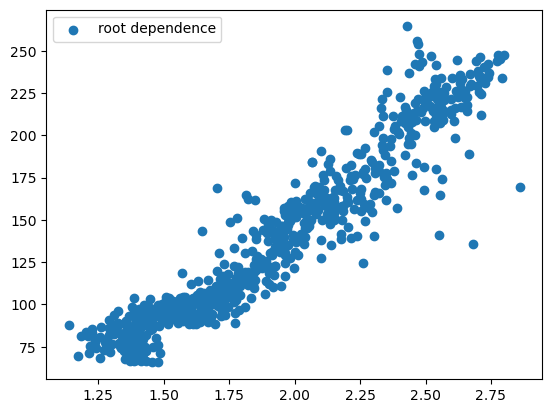

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


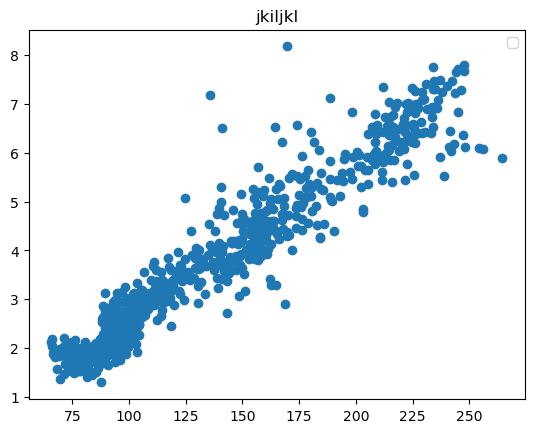

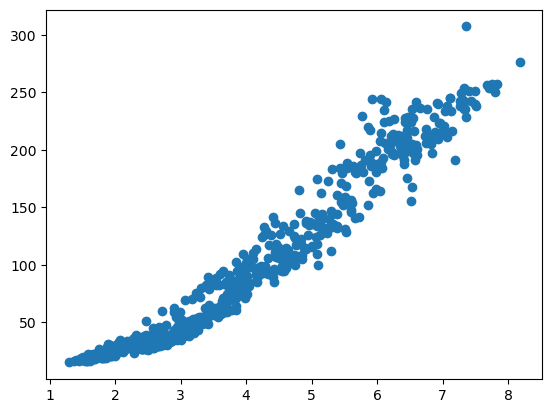

In [60]:
ss = h0

tau_eta = ss.t_eta
tau_0 = ss.t_turnover
re = ss.re
eps = ss.eps
urms = ss.urms
v = ss.v
f = ss.f


plt.scatter(np.ones(len(urms)), urms**3/eps)
plt.legend()
plt.show()
plt.scatter(tau_0, urms**2 /eps)
plt.legend()
plt.show()

plt.scatter(np.sqrt(re), urms**2 * np.sqrt(5/(3*(eps*v))))
plt.legend()
plt.show()

plt.scatter(np.sqrt(re), tau_0/tau_eta, label="root dependence")
plt.legend()
plt.show()


plt.scatter(tau_0/tau_eta, urms**2 * np.sqrt(5/(3*(eps*v))))
plt.title("jkiljkl")
plt.legend()
plt.show()


plt.scatter(re, urms**2/(v*f))
plt.show()
